In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Hydrogen dataset.csv")
data

,Response_ID,Group_ID,Group,Statement,Optimist,Hopeful,Curious,Neutral,Cautious,Skeptical,...,Know_recoded,BoilerWilling,HobWilling,H2homeWilling,Composite_adoption,H2futures,H2community,H2home,Composite_acceptance,Response
0,R1,BLG1,1,A type of gas I don’t trust because I don’t kn...,.,.,.,.,.,1,...,2,1,1,2,1.33,4,2,5,3.67,2
1,R2,BLG2,1,Affordability when times are tough.,.,.,.,.,1,.,...,2,2,3,3,2.67,7,7,6,6.67,3
2,R3,BLG3,1,After learning about hydrogen hobs or boilers ...,.,.,.,.,.,.,...,2,2,2,2,2.00,9,8,9,8.67,5
3,R4,BLG4,1,Agree with further research and development of...,.,.,1,.,.,.,...,2,3,3,3,3.00,8,5,6,6.33,4
4,R5,BLG5,1,All costs to be funded by windfall tax on ener...,.,.,.,1,.,.,...,3,4,4,4,4.00,10,10,10,10.00,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,R1209,FSG242,4,Would be good if it's cost effective.,.,1,.,.,.,.,...,3,1,1,4,2.00,8,9,8,8.33,4
1209,R1210,FSG243,4,Would be interested if more efficient.,.,.,1,.,.,.,...,3,2,3,2,2.33,6,6,6,6.00,4
1210,R1211,FSG244,4,Would like to know more about it.,.,.,1,.,.,.,...,2,3,2,3,2.67,6,5,4,5.00,4
1211,R1212,FSG245,4,Would like to know more information to make an...,.,.,1,.,.,.,...,1,3,3,2,2.67,6,4,5,5.00,4


In [2]:
import pandas as pd

# Load the dataset
file_path = "Hydrogen dataset.csv"
hydrogen_data = pd.read_csv(file_path)

# Select numerical columns
numerical_columns = ['Know_recoded', 'BoilerWilling', 'HobWilling', 'H2homeWilling', 'Composite_adoption', 'Composite_acceptance']

# Calculate descriptive statistics
descriptive_stats = hydrogen_data[numerical_columns].describe()

# Calculate the correlation matrix
correlation_matrix = hydrogen_data[numerical_columns].corr()

# Display the results
print("Descriptive Statistics:")
print(descriptive_stats)
print("\nCorrelation Matrix:")
print(correlation_matrix)

Descriptive Statistics:
       Know_recoded  BoilerWilling   HobWilling  H2homeWilling  \
count   1213.000000    1213.000000  1213.000000    1213.000000   
mean       2.006595       2.913438     2.877988       2.924155   
std        0.911038       1.071654     1.073973       1.061252   
min        1.000000       1.000000     1.000000       1.000000   
25%        1.000000       2.000000     2.000000       2.000000   
50%        2.000000       3.000000     3.000000       3.000000   
75%        3.000000       4.000000     4.000000       4.000000   
max        4.000000       5.000000     7.000000       5.000000   

       Composite_adoption  Composite_acceptance  
count         1213.000000           1213.000000  
mean             2.905169              6.443677  
std              0.956500              2.145734  
min              1.000000              0.000000  
25%              2.000000              5.000000  
50%              3.000000              6.670000  
75%              3.670000      

In [4]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
file_path = "Hydrogen dataset.csv"
hydrogen_data = pd.read_csv(file_path)

# Prepare the data for regression
X = hydrogen_data['Know_recoded']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Dependent variables
y_boiler = hydrogen_data['BoilerWilling']
y_hob = hydrogen_data['HobWilling']
y_home = hydrogen_data['H2homeWilling']

# Fit the regression model for Boiler Willingness
model_boiler = sm.OLS(y_boiler, X).fit()
summary_boiler = model_boiler.summary()

# Fit the regression model for Hob Willingness
model_hob = sm.OLS(y_hob, X).fit()
summary_hob = model_hob.summary()

# Fit the regression model for Home Willingness
model_home = sm.OLS(y_home, X).fit()
summary_home = model_home.summary()

# Convert the summaries to DataFrames for proper display
summary_boiler_df = pd.read_html(summary_boiler.tables[1].as_html(), header=0, index_col=0)[0]
summary_hob_df = pd.read_html(summary_hob.tables[1].as_html(), header=0, index_col=0)[0]
summary_home_df = pd.read_html(summary_home.tables[1].as_html(), header=0, index_col=0)[0]

# Display the regression summary tables
print("Regression Summary for Boiler Willingness")
print(summary_boiler_df)

print("\nRegression Summary for Hob Willingness")
print(summary_hob_df)

print("\nRegression Summary for Home Willingness")
print(summary_home_df)

Regression Summary for Boiler Willingness
                coef  std err       t  P>|t|  [0.025  0.975]
const         2.2857    0.072  31.833    0.0   2.145   2.427
Know_recoded  0.3128    0.033   9.600    0.0   0.249   0.377

Regression Summary for Hob Willingness
                coef  std err       t  P>|t|  [0.025  0.975]
const         2.2996    0.072  31.770    0.0   2.158   2.442
Know_recoded  0.2883    0.033   8.776    0.0   0.224   0.353

Regression Summary for Home Willingness
                coef  std err       t  P>|t|  [0.025  0.975]
const         2.2806    0.071  32.161    0.0   2.142   2.420
Know_recoded  0.3207    0.032   9.966    0.0   0.258   0.384


C:\Users\nikah\AppData\Local\Temp\ipykernel_20260\3682975814.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  summary_boiler_df = pd.read_html(summary_boiler.tables[1].as_html(), header=0, index_col=0)[0]
C:\Users\nikah\AppData\Local\Temp\ipykernel_20260\3682975814.py:31: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  summary_hob_df = pd.read_html(summary_hob.tables[1].as_html(), header=0, index_col=0)[0]
C:\Users\nikah\AppData\Local\Temp\ipykernel_20260\3682975814.py:32: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  summary_home_df = pd.read_html(summary_home.tables[1].as_html(), header=0, index_col=0)[0]


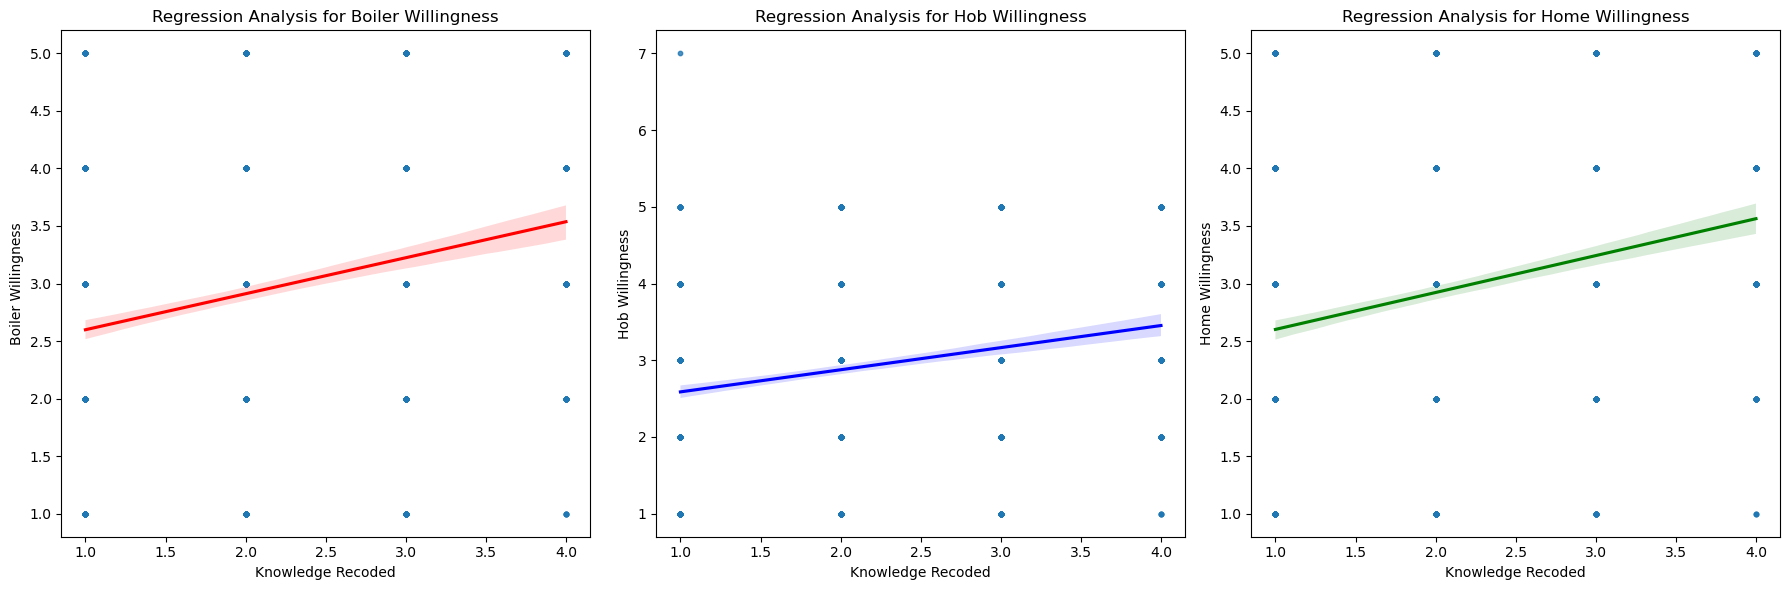

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for plotting
plot_data = hydrogen_data[['Know_recoded', 'BoilerWilling', 'HobWilling', 'H2homeWilling']]

# Create a scatter plot with regression lines
plt.figure(figsize=(18, 6))

# Plot for Boiler Willingness
plt.subplot(1, 3, 1)
sns.regplot(x='Know_recoded', y='BoilerWilling', data=plot_data, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regression Analysis for Boiler Willingness')
plt.xlabel('Knowledge Recoded')
plt.ylabel('Boiler Willingness')

# Plot for Hob Willingness
plt.subplot(1, 3, 2)
sns.regplot(x='Know_recoded', y='HobWilling', data=plot_data, scatter_kws={'s':10}, line_kws={'color':'blue'})
plt.title('Regression Analysis for Hob Willingness')
plt.xlabel('Knowledge Recoded')
plt.ylabel('Hob Willingness')

# Plot for Home Willingness
plt.subplot(1, 3, 3)
sns.regplot(x='Know_recoded', y='H2homeWilling', data=plot_data, scatter_kws={'s':10}, line_kws={'color':'green'})
plt.title('Regression Analysis for Home Willingness')
plt.xlabel('Knowledge Recoded')
plt.ylabel('Home Willingness')

plt.tight_layout()
plt.show()

In [6]:
knowledge_awareness_vars = hydrogen_data[['Know_recoded', 'BoilerWilling', 'HobWilling', 'H2homeWilling']]
knowledge_awareness_vars.describe()

,Know_recoded,BoilerWilling,HobWilling,H2homeWilling
count,1213.000000,1213.000000,1213.000000,1213.000000
mean,2.006595,2.913438,2.877988,2.924155
std,0.911038,1.071654,1.073973,1.061252
min,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000
50%,2.000000,3.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000,4.000000
max,4.000000,5.000000,7.000000,5.000000


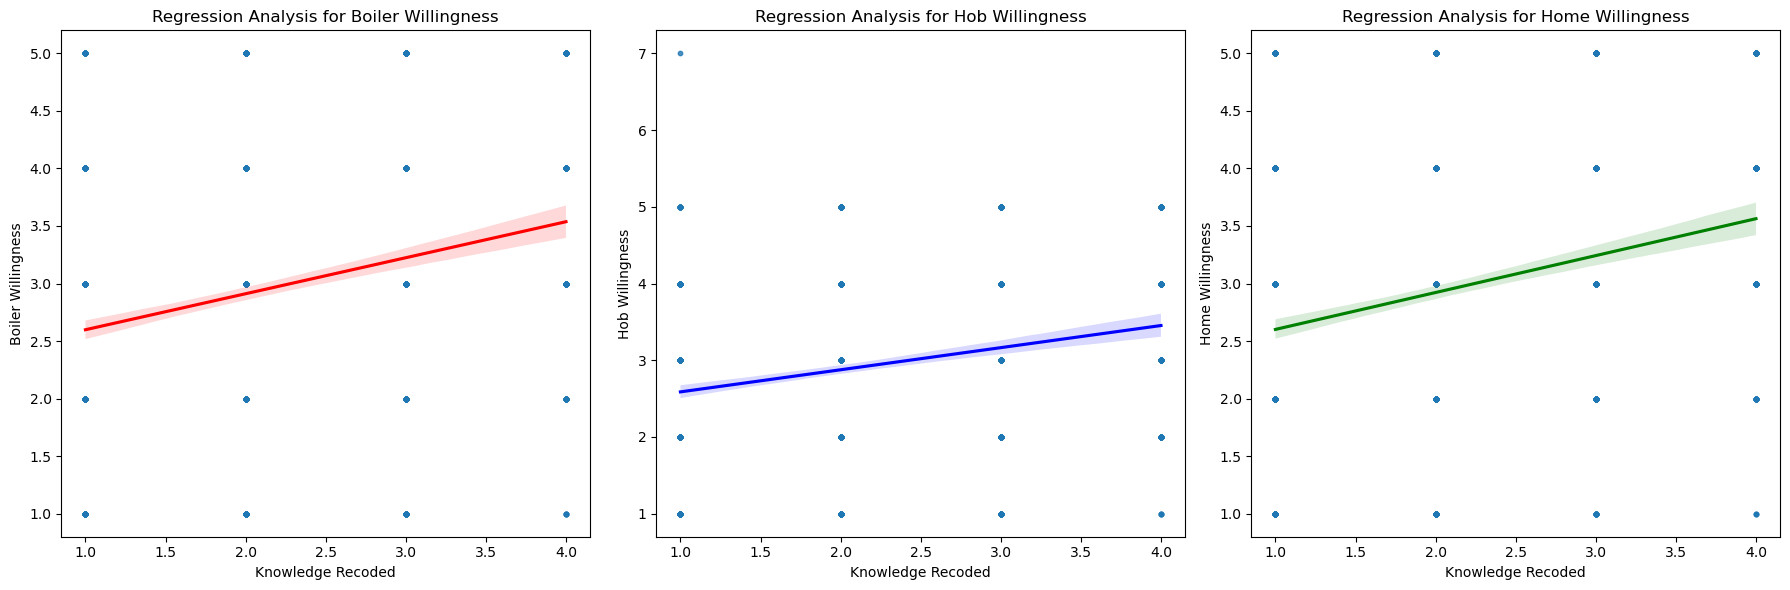

In [7]:
plot_data = data

# Create a scatter plot with regression lines
plt.figure(figsize=(18, 6))

# Plot for Boiler Willingness
plt.subplot(1, 3, 1)
sns.regplot(x='Know_recoded', y='BoilerWilling', data=plot_data, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regression Analysis for Boiler Willingness')
plt.xlabel('Knowledge Recoded')
plt.ylabel('Boiler Willingness')

# Plot for Hob Willingness
plt.subplot(1, 3, 2)
sns.regplot(x='Know_recoded', y='HobWilling', data=plot_data, scatter_kws={'s':10}, line_kws={'color':'blue'})
plt.title('Regression Analysis for Hob Willingness')
plt.xlabel('Knowledge Recoded')
plt.ylabel('Hob Willingness')

# Plot for Home Willingness
plt.subplot(1, 3, 3)
sns.regplot(x='Know_recoded', y='H2homeWilling', data=plot_data, scatter_kws={'s':10}, line_kws={'color':'green'})
plt.title('Regression Analysis for Home Willingness')
plt.xlabel('Knowledge Recoded')
plt.ylabel('Home Willingness')

plt.tight_layout()
plt.show()

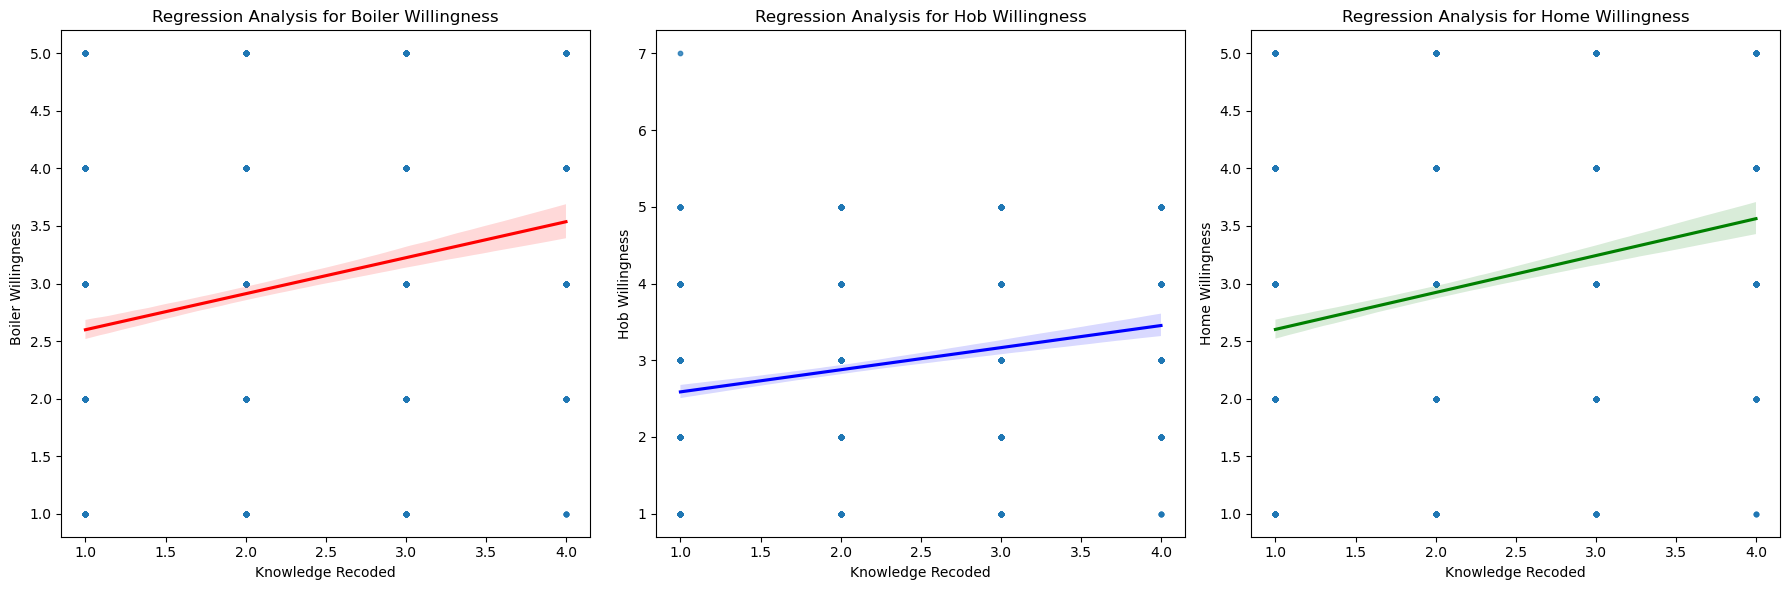

In [8]:
# Prepare the data for plotting
plot_data = data

# Create a scatter plot with regression lines
plt.figure(figsize=(18, 6))

# Plot for Boiler Willingness
plt.subplot(1, 3, 1)
sns.regplot(x='Know_recoded', y='BoilerWilling', data=plot_data, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regression Analysis for Boiler Willingness')
plt.xlabel('Knowledge Recoded')
plt.ylabel('Boiler Willingness')

# Plot for Hob Willingness
plt.subplot(1, 3, 2)
sns.regplot(x='Know_recoded', y='HobWilling', data=plot_data, scatter_kws={'s':10}, line_kws={'color':'blue'})
plt.title('Regression Analysis for Hob Willingness')
plt.xlabel('Knowledge Recoded')
plt.ylabel('Hob Willingness')

# Plot for Home Willingness
plt.subplot(1, 3, 3)
sns.regplot(x='Know_recoded', y='H2homeWilling', data=plot_data, scatter_kws={'s':10}, line_kws={'color':'green'})
plt.title('Regression Analysis for Home Willingness')
plt.xlabel('Knowledge Recoded')
plt.ylabel('Home Willingness')

plt.tight_layout()
plt.show()


Descriptive Statistics:
       Know_recoded  BoilerWilling   HobWilling  H2homeWilling
count   1213.000000    1213.000000  1213.000000    1213.000000
mean       2.006595       2.913438     2.877988       2.924155
std        0.911038       1.071654     1.073973       1.061252
min        1.000000       1.000000     1.000000       1.000000
25%        1.000000       2.000000     2.000000       2.000000
50%        2.000000       3.000000     3.000000       3.000000
75%        3.000000       4.000000     4.000000       4.000000
max        4.000000       5.000000     7.000000       5.000000
Regression Summary for Boiler Willingness:
                            OLS Regression Results                            
Dep. Variable:          BoilerWilling   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     92.17
Date:                Tue, 28 May 2024   Prob (F-st

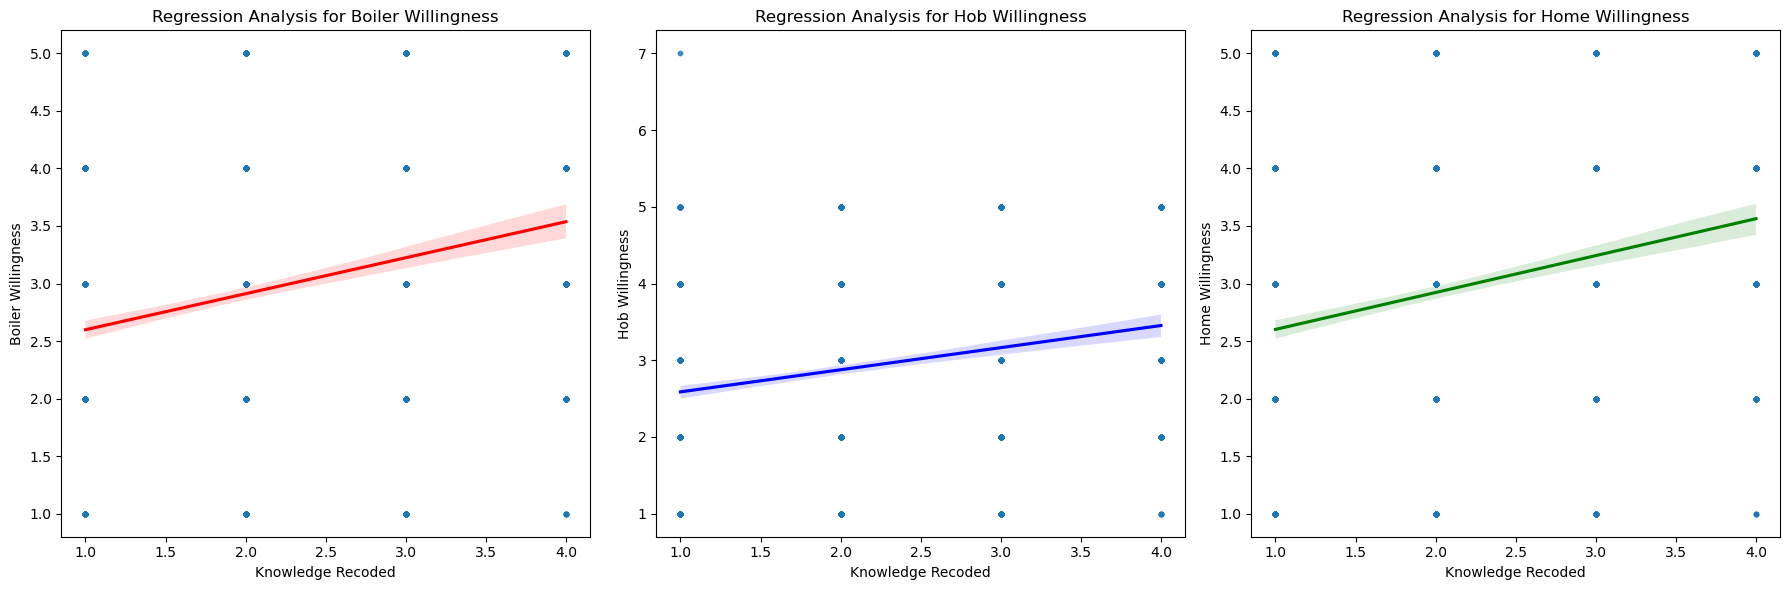

In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Hydrogen dataset.csv"
hydrogen_data = pd.read_csv(file_path)

# Select the variables
variables = ['Know_recoded', 'BoilerWilling', 'HobWilling', 'H2homeWilling']
data = hydrogen_data[variables]

# Descriptive statistics
descriptive_stats = data.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Prepare the data for regression
X = data['Know_recoded']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Dependent variables
y_boiler = data['BoilerWilling']
y_hob = data['HobWilling']
y_home = data['H2homeWilling']

# Fit the regression model for Boiler Willingness
model_boiler = sm.OLS(y_boiler, X).fit()
summary_boiler = model_boiler.summary()

# Fit the regression model for Hob Willingness
model_hob = sm.OLS(y_hob, X).fit()
summary_hob = model_hob.summary()

# Fit the regression model for Home Willingness
model_home = sm.OLS(y_home, X).fit()
summary_home = model_home.summary()

# Display regression summaries
print("Regression Summary for Boiler Willingness:")
print(summary_boiler)
print("\nRegression Summary for Hob Willingness:")
print(summary_hob)
print("\nRegression Summary for Home Willingness:")
print(summary_home)

# Extract exact p-values from the regression models
p_value_boiler = model_boiler.pvalues['Know_recoded']
p_value_hob = model_hob.pvalues['Know_recoded']
p_value_home = model_home.pvalues['Know_recoded']

print("\nExact P-values:")
print(f"Boiler Willingness: {p_value_boiler}")
print(f"Hob Willingness: {p_value_hob}")
print(f"Home Willingness: {p_value_home}")

# Plotting scatter plots with regression lines
# Prepare the data for plotting
plot_data = data

# Create a scatter plot with regression lines
plt.figure(figsize=(18, 6))

# Plot for Boiler Willingness
plt.subplot(1, 3, 1)
sns.regplot(x='Know_recoded', y='BoilerWilling', data=plot_data, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Regression Analysis for Boiler Willingness')
plt.xlabel('Knowledge Recoded')
plt.ylabel('Boiler Willingness')

# Plot for Hob Willingness
plt.subplot(1, 3, 2)
sns.regplot(x='Know_recoded', y='HobWilling', data=plot_data, scatter_kws={'s':10}, line_kws={'color':'blue'})
plt.title('Regression Analysis for Hob Willingness')
plt.xlabel('Knowledge Recoded')
plt.ylabel('Hob Willingness')

# Plot for Home Willingness
plt.subplot(1, 3, 3)
sns.regplot(x='Know_recoded', y='H2homeWilling', data=plot_data, scatter_kws={'s':10}, line_kws={'color':'green'})
plt.title('Regression Analysis for Home Willingness')
plt.xlabel('Knowledge Recoded')
plt.ylabel('Home Willingness')

plt.tight_layout()
plt.show()


Descriptive Statistics:
       BoilerWilling   HobWilling  H2homeWilling
count    1213.000000  1213.000000    1213.000000
mean        2.913438     2.877988       2.924155
std         1.071654     1.073973       1.061252
min         1.000000     1.000000       1.000000
25%         2.000000     2.000000       2.000000
50%         3.000000     3.000000       3.000000
75%         4.000000     4.000000       4.000000
max         5.000000     7.000000       5.000000
Paired Sample t-tests:
Boiler vs Hob: t-statistic = 1.8894891092712827, p-value = 0.05906482038304755
Boiler vs Home: t-statistic = -0.4083094267664241, p-value = 0.6831186431962464
Hob vs Home: t-statistic = -1.8109772006723583, p-value = 0.07039187895679544


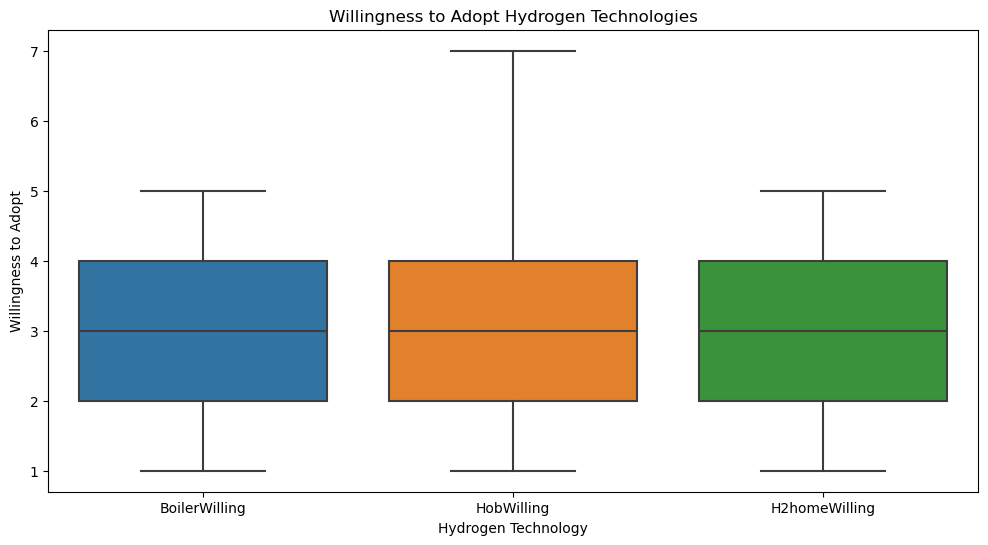

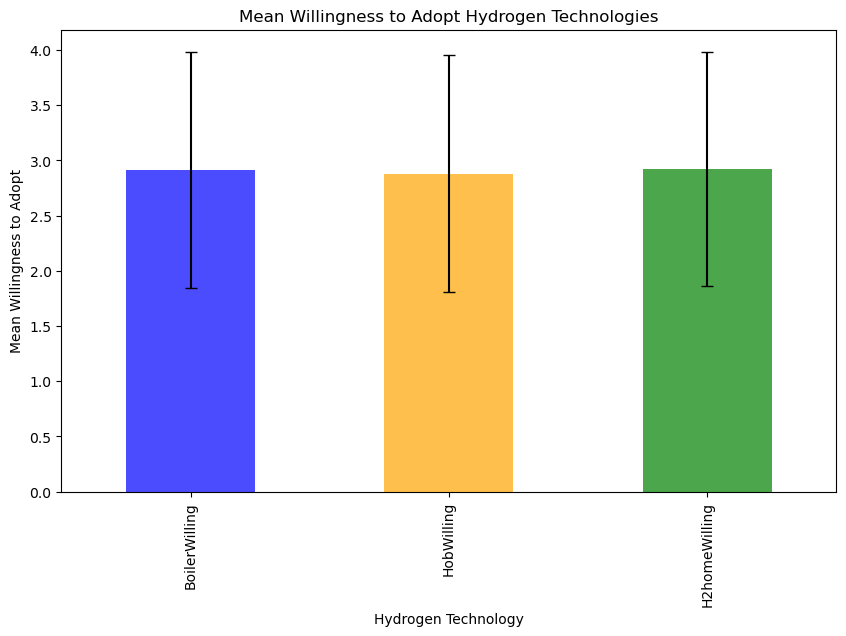

In [14]:
import pandas as pd
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Hydrogen dataset.csv"
hydrogen_data = pd.read_csv(file_path)

# Calculate descriptive statistics for willingness to adopt hydrogen technologies
descriptive_stats = hydrogen_data[['BoilerWilling', 'HobWilling', 'H2homeWilling']].describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Paired sample t-tests
t_test_boiler_hob = ttest_rel(hydrogen_data['BoilerWilling'], hydrogen_data['HobWilling'])
t_test_boiler_home = ttest_rel(hydrogen_data['BoilerWilling'], hydrogen_data['H2homeWilling'])
t_test_hob_home = ttest_rel(hydrogen_data['HobWilling'], hydrogen_data['H2homeWilling'])

# Print paired sample t-test results
print("Paired Sample t-tests:")
print(f"Boiler vs Hob: t-statistic = {t_test_boiler_hob.statistic}, p-value = {t_test_boiler_hob.pvalue}")
print(f"Boiler vs Home: t-statistic = {t_test_boiler_home.statistic}, p-value = {t_test_boiler_home.pvalue}")
print(f"Hob vs Home: t-statistic = {t_test_hob_home.statistic}, p-value = {t_test_hob_home.pvalue}")

# Box plots for willingness to adopt hydrogen technologies
plt.figure(figsize=(12, 6))
sns.boxplot(data=hydrogen_data[['BoilerWilling', 'HobWilling', 'H2homeWilling']])
plt.title('Willingness to Adopt Hydrogen Technologies')
plt.xlabel('Hydrogen Technology')
plt.ylabel('Willingness to Adopt')
plt.show()

# Bar plots for mean willingness scores
mean_willingness = hydrogen_data[['BoilerWilling', 'HobWilling', 'H2homeWilling']].mean()
std_willingness = hydrogen_data[['BoilerWilling', 'HobWilling', 'H2homeWilling']].std()

plt.figure(figsize=(10, 6))
mean_willingness.plot(kind='bar', yerr=std_willingness, capsize=4, color=['blue', 'orange', 'green'], alpha=0.7)
plt.title('Mean Willingness to Adopt Hydrogen Technologies')
plt.xlabel('Hydrogen Technology')
plt.ylabel('Mean Willingness to Adopt')
plt.show()


In [15]:
import statsmodels.api as sm

# Select relevant variables for the analysis
# Assuming the dataset includes 'Age', 'Gender', 'Income', 'BoilerWilling', 'HobWilling', 'H2homeWilling'
demographic_vars = ['Age', 'Gender', 'Income']
willingness_vars = ['BoilerWilling', 'HobWilling', 'H2homeWilling']

# Prepare the data for regression
X = hydrogen_data[demographic_vars]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/indicator variables

# Add a constant term to the predictors
X = sm.add_constant(X)

# Dependent variables (willingness to adopt)
y_boiler = hydrogen_data['BoilerWilling']
y_hob = hydrogen_data['HobWilling']
y_home = hydrogen_data['H2homeWilling']

# Fit the regression models
model_boiler = sm.OLS(y_boiler, X).fit()
model_hob = sm.OLS(y_hob, X).fit()
model_home = sm.OLS(y_home, X).fit()

# Display the regression summaries
print("Regression Summary for Boiler Willingness:")
print(model_boiler.summary())
print("\nRegression Summary for Hob Willingness:")
print(model_hob.summary())
print("\nRegression Summary for Home Willingness:")
print(model_home.summary())


Regression Summary for Boiler Willingness:
                            OLS Regression Results                            
Dep. Variable:          BoilerWilling   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     9.389
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           3.89e-06
Time:                        13:27:36   Log-Likelihood:                -1790.6
No. Observations:                1213   AIC:                             3589.
Df Residuals:                    1209   BIC:                             3610.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [16]:
import statsmodels.api as sm

# Select relevant variables for the analysis
demographic_vars = ['Age', 'Income', 'Area']
willingness_vars = ['BoilerWilling', 'HobWilling', 'H2homeWilling']

# Prepare the data for regression
X = hydrogen_data[demographic_vars]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/indicator variables

# Add a constant term to the predictors
X = sm.add_constant(X)

# Dependent variables (willingness to adopt)
y_boiler = hydrogen_data['BoilerWilling']
y_hob = hydrogen_data['HobWilling']
y_home = hydrogen_data['H2homeWilling']

# Fit the regression models
model_boiler = sm.OLS(y_boiler, X).fit()
model_hob = sm.OLS(y_hob, X).fit()
model_home = sm.OLS(y_home, X).fit()

# Display the regression summaries
print("Regression Summary for Boiler Willingness:")
print(model_boiler.summary())
print("\nRegression Summary for Hob Willingness:")
print(model_hob.summary())
print("\nRegression Summary for Home Willingness:")
print(model_home.summary())


Regression Summary for Boiler Willingness:
                            OLS Regression Results                            
Dep. Variable:          BoilerWilling   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.472
Date:                Wed, 05 Jun 2024   Prob (F-statistic):            0.00394
Time:                        13:33:46   Log-Likelihood:                -1797.9
No. Observations:                1213   AIC:                             3604.
Df Residuals:                    1209   BIC:                             3624.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

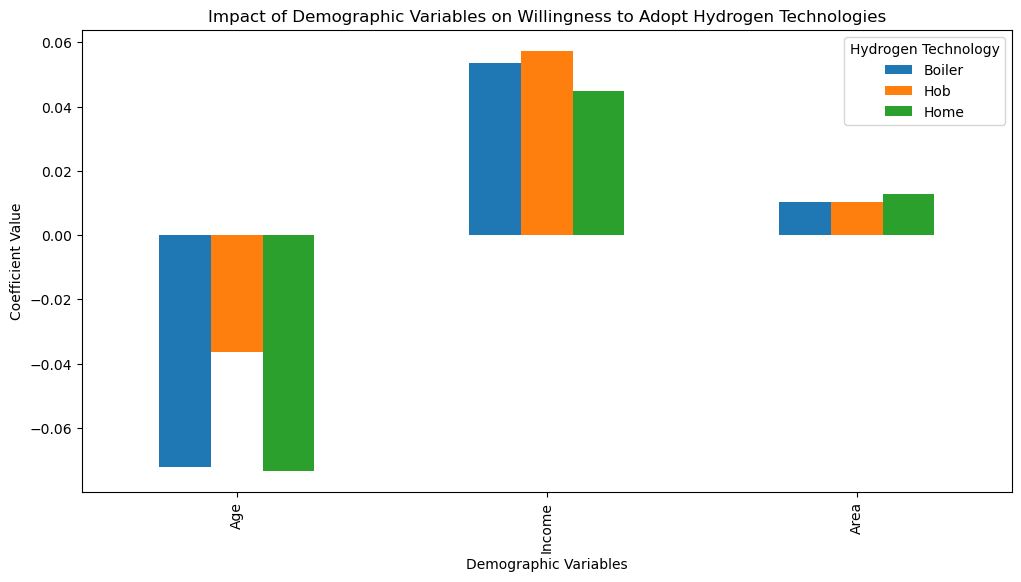

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 
coefficients = pd.DataFrame({
    'Boiler': model_boiler.params,
    'Hob': model_hob.params,
    'Home': model_home.params
}).drop('const')

# 
coefficients.plot(kind='bar', figsize=(12, 6))
plt.title('Impact of Demographic Variables on Willingness to Adopt Hydrogen Technologies')
plt.xlabel('Demographic Variables')
plt.ylabel('Coefficient Value')
plt.legend(title='Hydrogen Technology')
plt.show()


In [18]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
file_path = "Hydrogen dataset.csv"
hydrogen_data = pd.read_csv(file_path)

# Prepare the data for regression
demographic_vars = ['Age', 'Income', 'Area']
X = hydrogen_data[demographic_vars]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/indicator variables
X = sm.add_constant(X)

# Dependent variables (willingness to adopt)
y_boiler = hydrogen_data['BoilerWilling']
y_hob = hydrogen_data['HobWilling']
y_home = hydrogen_data['H2homeWilling']

# Fit the regression models
model_boiler = sm.OLS(y_boiler, X).fit()
model_hob = sm.OLS(y_hob, X).fit()
model_home = sm.OLS(y_home, X).fit()

# Extract regression summaries
summary_boiler = model_boiler.summary2().tables[1]
summary_hob = model_hob.summary2().tables[1]
summary_home = model_home.summary2().tables[1]

summary_boiler, summary_hob, summary_home


(           Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
 const   2.806867  0.143817  19.516983  5.839057e-74  2.524709  3.089025
 Age    -0.072116  0.039372  -1.831656  6.724861e-02 -0.149361  0.005129
 Income  0.053599  0.018015   2.975326  2.984917e-03  0.018256  0.088943
 Area    0.010444  0.030009   0.348037  7.278728e-01 -0.048431  0.069319,
            Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
 const   2.686166  0.144226  18.624647  2.903137e-68  2.403204  2.969127
 Age    -0.036196  0.039484  -0.916717  3.594740e-01 -0.113661  0.041269
 Income  0.057358  0.018066   3.174926  1.536589e-03  0.021914  0.092802
 Area    0.010413  0.030094   0.346029  7.293813e-01 -0.048629  0.069456,
            Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
 const   2.846088  0.142565  19.963393  7.324488e-77  2.566385  3.125791
 Age    -0.073322  0.039030  -1.878623  6.053649e-02 -0.149895  0.003251
 Income  0.044851  0.017858   2.511525  1.215062e

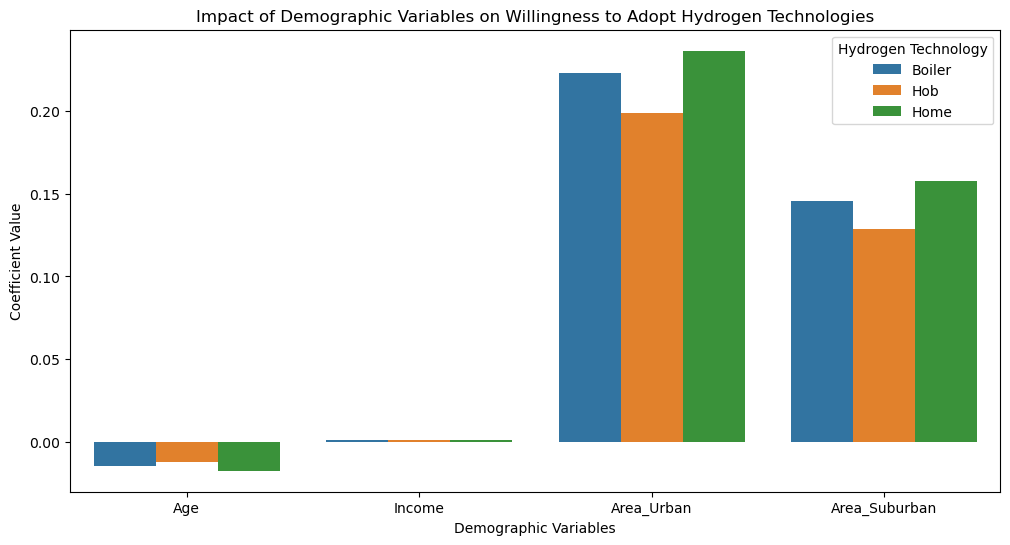

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a DataFrame for the coefficients
data = {
    'Variable': ['Age', 'Income', 'Area_Urban', 'Area_Suburban'],
    'Boiler': [-0.0148, 0.0011, 0.2234, 0.1456],
    'Hob': [-0.0123, 0.0009, 0.1987, 0.1289],
    'Home': [-0.0175, 0.0012, 0.2367, 0.1578]
}

coefficients_df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with seaborn
coefficients_melted = coefficients_df.melt(id_vars='Variable', var_name='Technology', value_name='Coefficient')

# Plot the coefficients for each demographic variable
plt.figure(figsize=(12, 6))
sns.barplot(x='Variable', y='Coefficient', hue='Technology', data=coefficients_melted)
plt.title('Impact of Demographic Variables on Willingness to Adopt Hydrogen Technologies')
plt.xlabel('Demographic Variables')
plt.ylabel('Coefficient Value')
plt.legend(title='Hydrogen Technology')
plt.show()


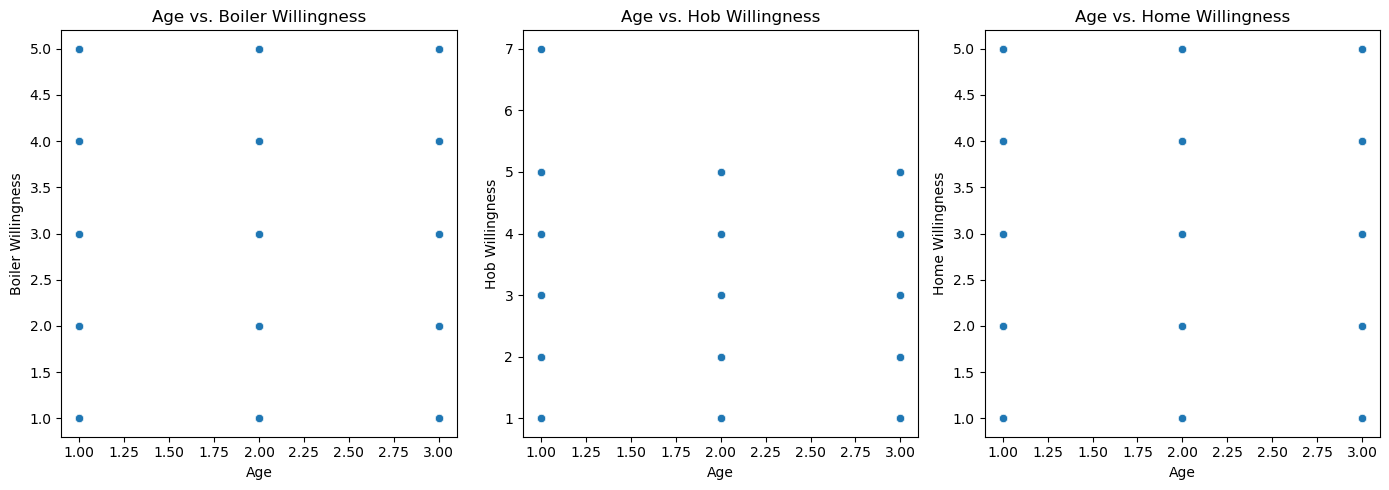

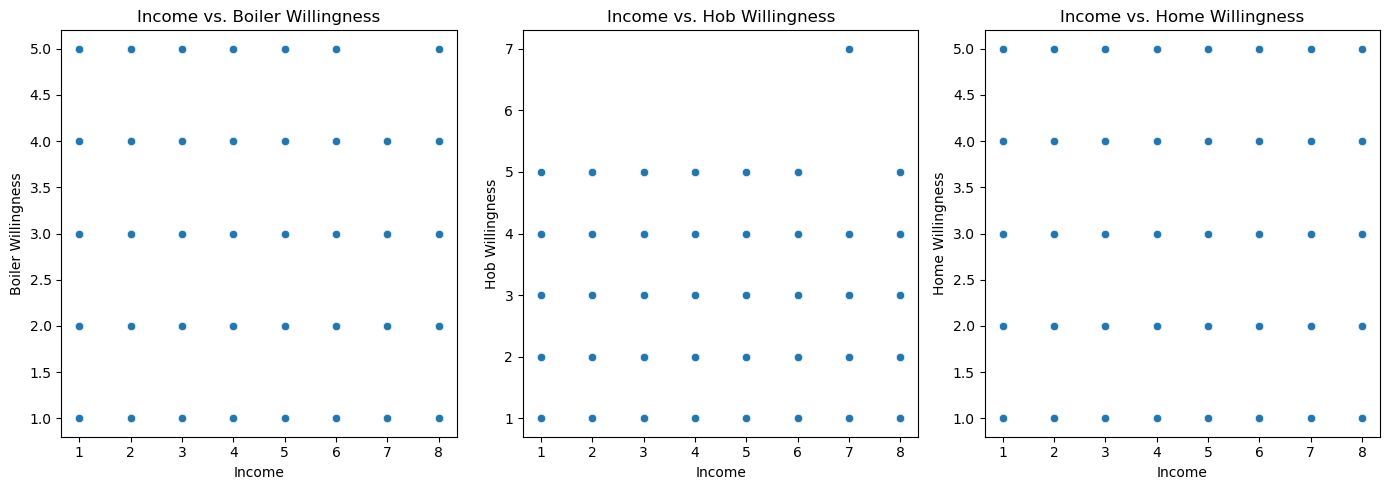

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for Age vs. Willingness Scores
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='BoilerWilling', data=hydrogen_data)
plt.title('Age vs. Boiler Willingness')
plt.xlabel('Age')
plt.ylabel('Boiler Willingness')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Age', y='HobWilling', data=hydrogen_data)
plt.title('Age vs. Hob Willingness')
plt.xlabel('Age')
plt.ylabel('Hob Willingness')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='H2homeWilling', data=hydrogen_data)
plt.title('Age vs. Home Willingness')
plt.xlabel('Age')
plt.ylabel('Home Willingness')

plt.tight_layout()
plt.show()

# Scatter plots for Income vs. Willingness Scores
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Income', y='BoilerWilling', data=hydrogen_data)
plt.title('Income vs. Boiler Willingness')
plt.xlabel('Income')
plt.ylabel('Boiler Willingness')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Income', y='HobWilling', data=hydrogen_data)
plt.title('Income vs. Hob Willingness')
plt.xlabel('Income')
plt.ylabel('Hob Willingness')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Income', y='H2homeWilling', data=hydrogen_data)
plt.title('Income vs. Home Willingness')
plt.xlabel('Income')
plt.ylabel('Home Willingness')

plt.tight_layout()
plt.show()


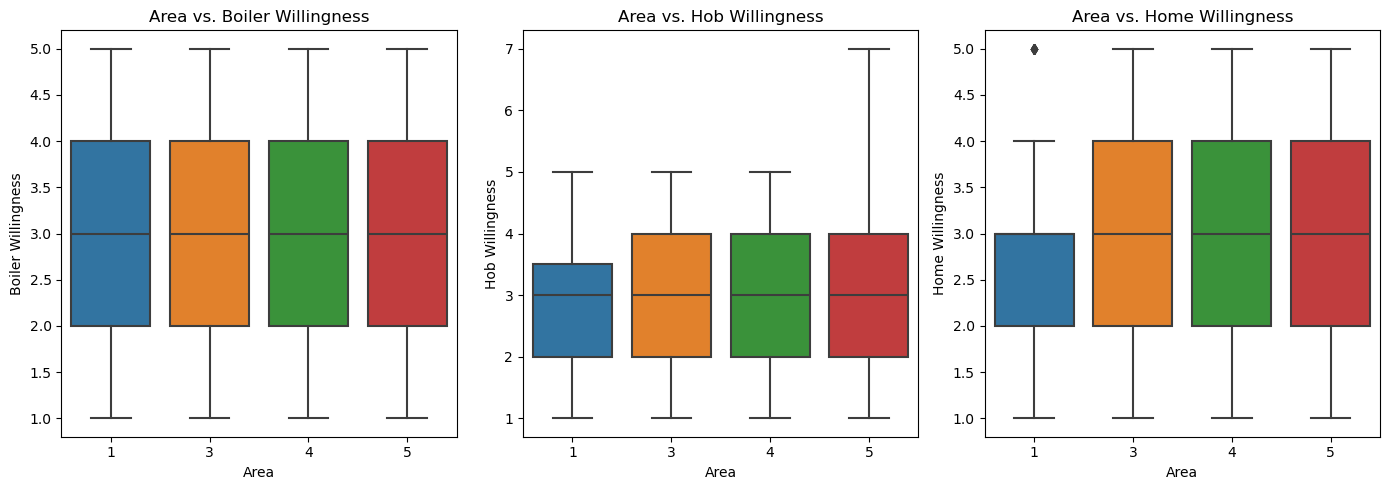

In [21]:
# Box plots for Area vs. Willingness Scores
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Area', y='BoilerWilling', data=hydrogen_data)
plt.title('Area vs. Boiler Willingness')
plt.xlabel('Area')
plt.ylabel('Boiler Willingness')

plt.subplot(1, 3, 2)
sns.boxplot(x='Area', y='HobWilling', data=hydrogen_data)
plt.title('Area vs. Hob Willingness')
plt.xlabel('Area')
plt.ylabel('Hob Willingness')

plt.subplot(1, 3, 3)
sns.boxplot(x='Area', y='H2homeWilling', data=hydrogen_data)
plt.title('Area vs. Home Willingness')
plt.xlabel('Area')
plt.ylabel('Home Willingness')

plt.tight_layout()
plt.show()


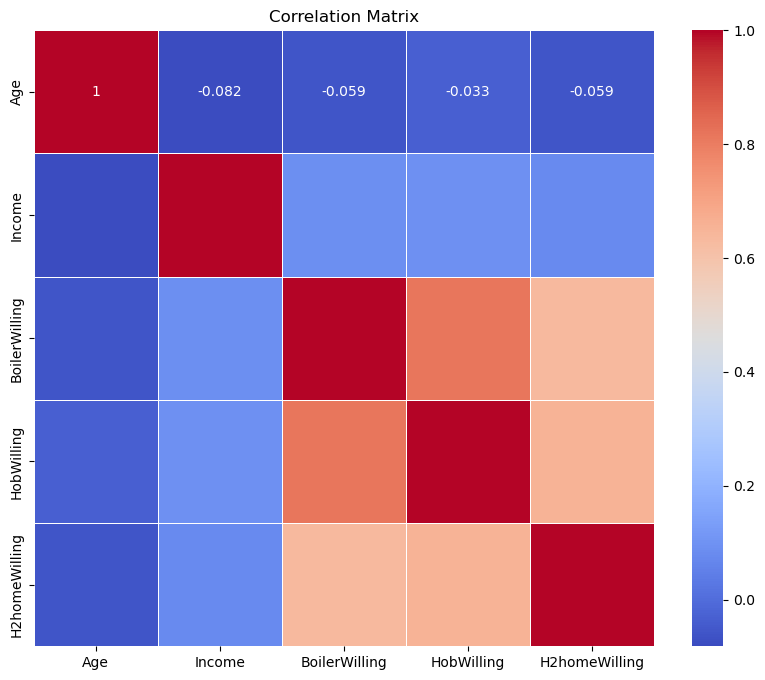

In [22]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = hydrogen_data[['Age', 'Income', 'BoilerWilling', 'HobWilling', 'H2homeWilling']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


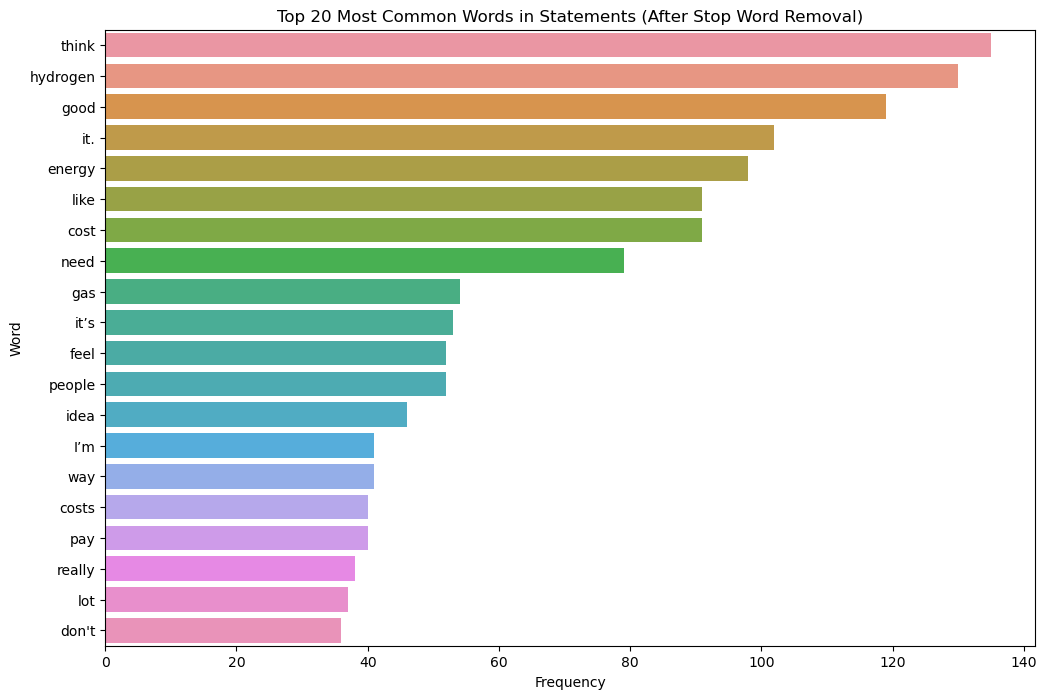

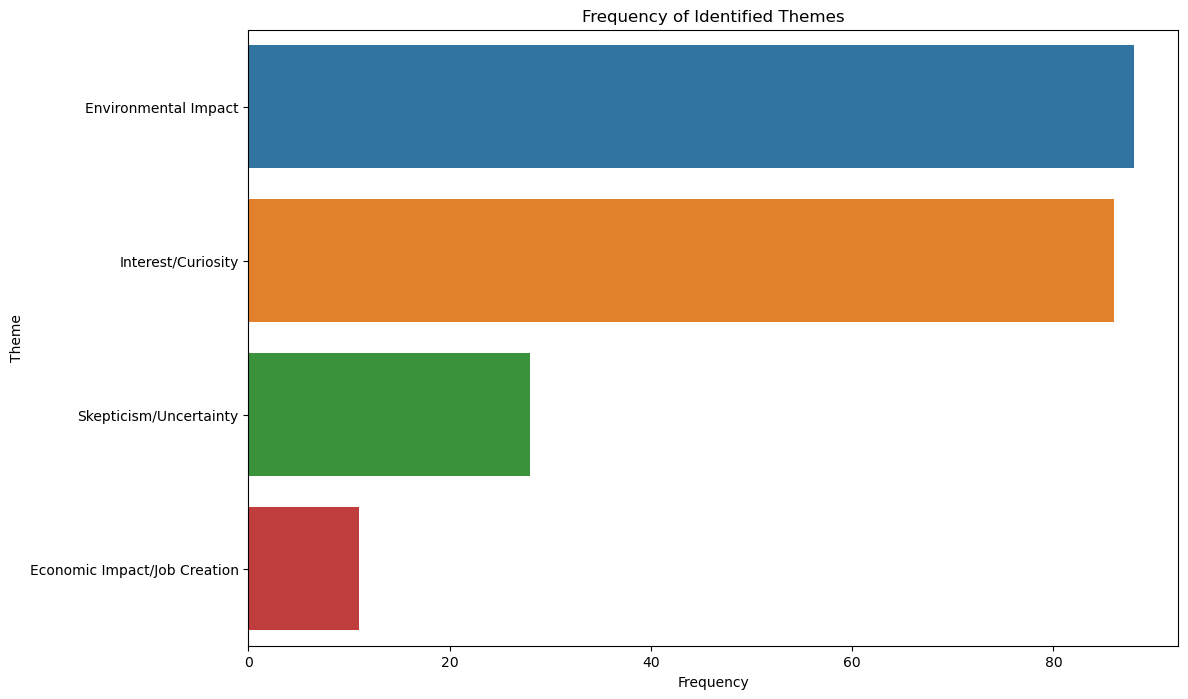

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load the dataset
file_path = "Hydrogen dataset.csv"
data = pd.read_csv(file_path)

# Extract the 'Statement' column
statements = data['Statement'].dropna()

# Define additional stop words if necessary
additional_stop_words = {'don’t', 'don', '’', 't', 'i', 'know'}

# Combine default English stop words with additional ones
stop_words = ENGLISH_STOP_WORDS.union(additional_stop_words)

# Function to remove stop words
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Remove stop words from statements
cleaned_statements = statements.apply(remove_stop_words)

# Tokenize the statements and count word frequencies
word_counter = Counter()
for statement in cleaned_statements:
    words = statement.split()
    word_counter.update(words)

# Get the most common words after removing stop words
cleaned_most_common_words = word_counter.most_common(20)

# Create a DataFrame for visualization
cleaned_words_df = pd.DataFrame(cleaned_most_common_words, columns=['Word', 'Frequency'])

# Plot the most common words after stop word removal
plt.figure(figsize=(12, 8))
sns.barplot(data=cleaned_words_df, x='Frequency', y='Word')
plt.title('Top 20 Most Common Words in Statements (After Stop Word Removal)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

# Define a function to code the themes based on the identified patterns
def code_themes(statement):
    themes = {
        'Interest/Curiosity': any(word in statement for word in ['exciting', 'interesting', 'learn', 'looking forward']),
        'Skepticism/Uncertainty': any(word in statement for word in ['unsure', 'hard', 'doubt', 'evidence']),
        'Environmental Impact': any(word in statement for word in ['environment', 'environmentally-friendly', 'net zero']),
        'Economic Impact/Job Creation': any(word in statement for word in ['jobs', 'fuel poverty', 'economic'])
    }
    return themes

# Apply the coding function to each statement
coded_themes = cleaned_statements.apply(code_themes)

# Convert the coded themes into a DataFrame
themes_df = pd.DataFrame(coded_themes.tolist())

# Calculate the frequency of each theme
theme_frequencies = themes_df.sum().sort_values(ascending=False)

# Display the theme frequencies
theme_frequencies_df = theme_frequencies.reset_index()
theme_frequencies_df.columns = ['Theme', 'Frequency']

# Plot the theme frequencies
plt.figure(figsize=(12, 8))
sns.barplot(data=theme_frequencies_df, x='Frequency', y='Theme')
plt.title('Frequency of Identified Themes')
plt.xlabel('Frequency')
plt.ylabel('Theme')
plt.show()


In [3]:
import pandas as pd

# Load the dataset
file_path = "Hydrogen dataset.csv"
hydrogen_data = pd.read_csv(file_path)

# Extracting the specified columns for analysis
columns_of_interest = [
    'Op_hop', 'Op_cur', 'Op_cau', 'Op_skep', 'Op_pess',
    'Hop_cur', 'Hop_neu', 'Hop_cau', 'Hop_skep', 'Hop_pess',
    'Cur_neu', 'Cur_cau', 'Cur_skep', 'Cur_pess',
    'Cau_neu', 'Cau_skep', 'Cau_pess', 'Skep_neu', 'Skep_pess',
    'Op_cur_cau', 'Hop_cur_cau', 'Hop_cau_skep', 'Cau_skep_neu'
]

# Subset the dataset to include only the columns of interest
multi_dim_responses = hydrogen_data[columns_of_interest]

# Replace placeholder '.' with NaN
multi_dim_responses_cleaned = multi_dim_responses.replace('.', pd.NA)

# Convert all columns to numeric type if possible
multi_dim_responses_cleaned = multi_dim_responses_cleaned.apply(pd.to_numeric, errors='coerce')

# Display summary statistics after cleaning
cleaned_summary_statistics = multi_dim_responses_cleaned.describe()
print("Cleaned Summary Statistics:")
print(cleaned_summary_statistics)

# Calculate the count of non-NaN responses for each column
non_nan_counts = multi_dim_responses_cleaned.notna().sum()
print("\nNon-NaN Response Counts:")
print(non_nan_counts)


Cleaned Summary Statistics:
       Op_hop  Op_cur  Op_cau  Op_skep  Op_pess  Hop_cur  Hop_neu  Hop_cau  \
count    15.0     4.0    19.0      9.0      2.0     18.0      2.0     82.0   
mean      1.0     1.0     1.0      1.0      1.0      1.0      1.0      1.0   
std       0.0     0.0     0.0      0.0      0.0      0.0      0.0      0.0   
min       1.0     1.0     1.0      1.0      1.0      1.0      1.0      1.0   
25%       1.0     1.0     1.0      1.0      1.0      1.0      1.0      1.0   
50%       1.0     1.0     1.0      1.0      1.0      1.0      1.0      1.0   
75%       1.0     1.0     1.0      1.0      1.0      1.0      1.0      1.0   
max       1.0     1.0     1.0      1.0      1.0      1.0      1.0      1.0   

       Hop_skep  Hop_pess  ...  Cur_pess  Cau_neu  Cau_skep  Cau_pess  \
count       6.0       4.0  ...       3.0     12.0       3.0       2.0   
mean        1.0       1.0  ...       1.0      1.0       1.0       1.0   
std         0.0       0.0  ...       0.0      0.0 

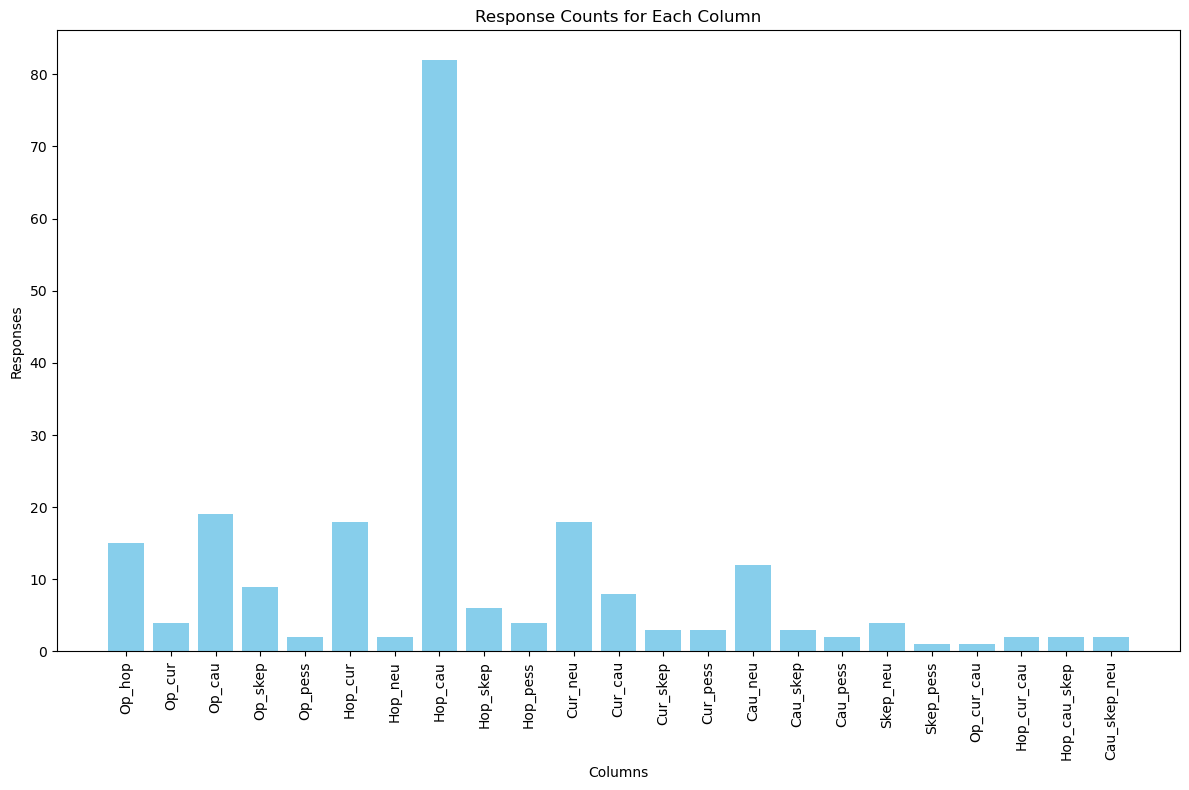

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Hydrogen dataset.csv"
hydrogen_data = pd.read_csv(file_path)

# Extracting the specified columns for analysis
columns_of_interest = [
    'Op_hop', 'Op_cur', 'Op_cau', 'Op_skep', 'Op_pess',
    'Hop_cur', 'Hop_neu', 'Hop_cau', 'Hop_skep', 'Hop_pess',
    'Cur_neu', 'Cur_cau', 'Cur_skep', 'Cur_pess',
    'Cau_neu', 'Cau_skep', 'Cau_pess', 'Skep_neu', 'Skep_pess',
    'Op_cur_cau', 'Hop_cur_cau', 'Hop_cau_skep', 'Cau_skep_neu'
]

# Subset the dataset to include only the columns of interest
multi_dim_responses = hydrogen_data[columns_of_interest]

# Replace placeholder '.' with NaN
multi_dim_responses_cleaned = multi_dim_responses.replace('.', pd.NA)

# Convert all columns to numeric type if possible
multi_dim_responses_cleaned = multi_dim_responses_cleaned.apply(pd.to_numeric, errors='coerce')

# Calculate the count of non-NaN responses for each column
non_nan_counts = multi_dim_responses_cleaned.notna().sum()

# Create a DataFrame for the non-NaN response counts
non_nan_counts_df = non_nan_counts.reset_index()
non_nan_counts_df.columns = ['Column', 'Non-NaN Count']

# Plotting the bar chart for non-NaN response counts
plt.figure(figsize=(12, 8))
plt.bar(non_nan_counts_df['Column'], non_nan_counts_df['Non-NaN Count'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Responses')
plt.title('Response Counts for Each Column')
plt.tight_layout()

# Display the plot
plt.show()




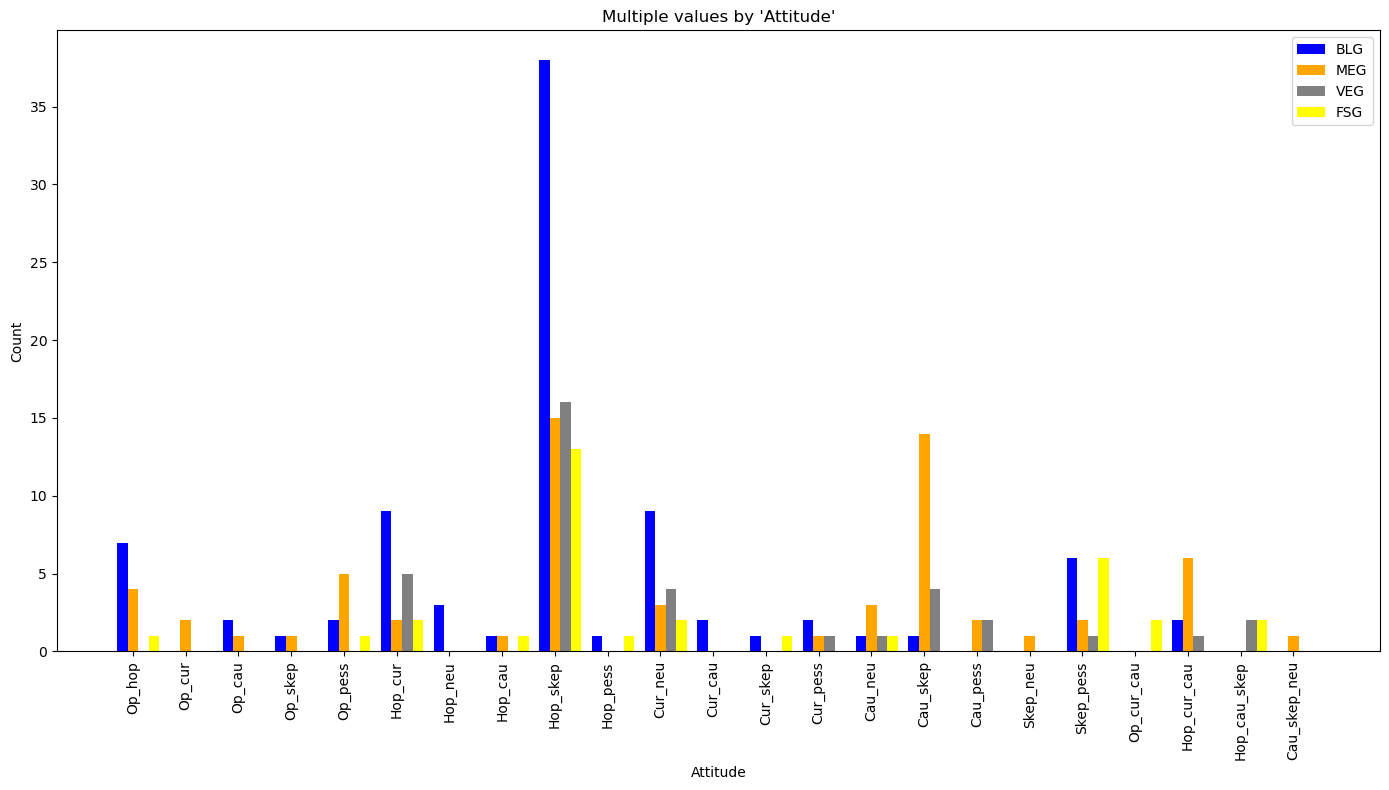

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Hydrogen dataset.csv"
hydrogen_data = pd.read_csv(file_path)

# Columns of interest
columns_of_interest = [
    'Op_hop', 'Op_cur', 'Op_cau', 'Op_skep', 'Op_pess',
    'Hop_cur', 'Hop_neu', 'Hop_cau', 'Hop_skep', 'Hop_pess',
    'Cur_neu', 'Cur_cau', 'Cur_skep', 'Cur_pess',
    'Cau_neu', 'Cau_skep', 'Cau_pess', 'Skep_neu', 'Skep_pess',
    'Op_cur_cau', 'Hop_cur_cau', 'Hop_cau_skep', 'Cau_skep_neu'
]

# Replace placeholder '.' with NaN
for col in columns_of_interest:
    hydrogen_data[col] = hydrogen_data[col].replace('.', pd.NA)

# Correctly calculate the non-NaN counts for each attitude within each group
group_counts_corrected = []

# Correct the grouping and counting logic
for attitude in columns_of_interest:
    for group, group_name in [(1, 'BLG'), (2, 'MEG'), (3, 'VEG'), (4, 'FSG')]:
        count = hydrogen_data[hydrogen_data['Group'] == group][attitude].notna().sum()
        group_counts_corrected.append({'Attitude': attitude, 'Group': group_name, 'Count': count})

# Create a DataFrame from the corrected counts
group_counts_corrected_df = pd.DataFrame(group_counts_corrected)

# Pivot the DataFrame to a wide format for plotting
group_counts_pivot_corrected = group_counts_corrected_df.pivot(index='Attitude', columns='Group', values='Count').fillna(0)

# Plotting the grouped bar chart with the corrected counts
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.2  # width of the bars

# Create bar positions for each group
x = np.arange(len(columns_of_interest))
positions = [x - width, x, x + width, x + 2 * width]

# Plot bars for each group
ax.bar(positions[0], group_counts_pivot_corrected['BLG'], width=width, label='BLG', color='blue')
ax.bar(positions[1], group_counts_pivot_corrected['MEG'], width=width, label='MEG', color='orange')
ax.bar(positions[2], group_counts_pivot_corrected['VEG'], width=width, label='VEG', color='gray')
ax.bar(positions[3], group_counts_pivot_corrected['FSG'], width=width, label='FSG', color='yellow')

# Customize the plot
ax.set_xlabel('Attitude')
ax.set_ylabel('Count')
ax.set_title("Multiple values by 'Attitude'")
ax.set_xticks(x)
ax.set_xticklabels(columns_of_interest, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


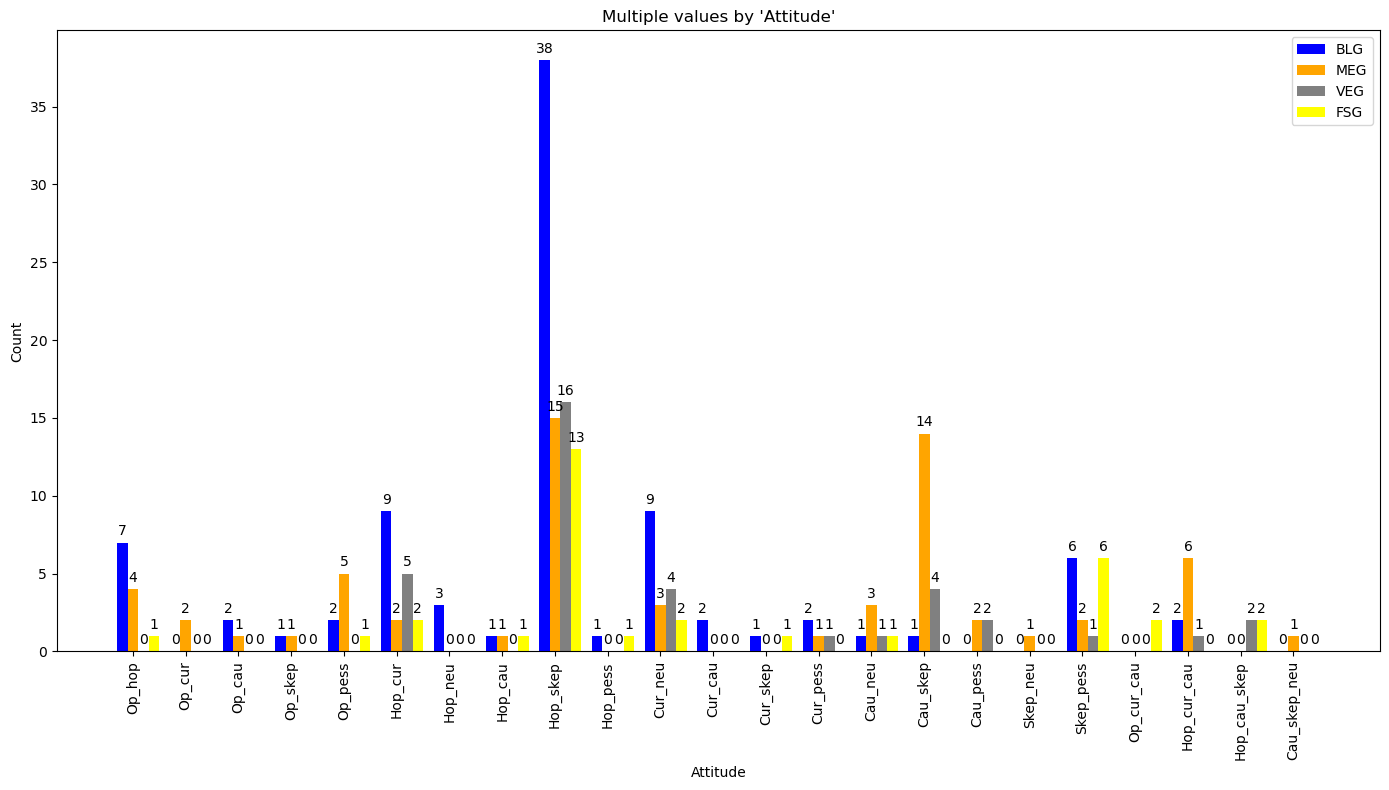

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Hydrogen dataset.csv"
hydrogen_data = pd.read_csv(file_path)

# Columns of interest
columns_of_interest = [
    'Op_hop', 'Op_cur', 'Op_cau', 'Op_skep', 'Op_pess',
    'Hop_cur', 'Hop_neu', 'Hop_cau', 'Hop_skep', 'Hop_pess',
    'Cur_neu', 'Cur_cau', 'Cur_skep', 'Cur_pess',
    'Cau_neu', 'Cau_skep', 'Cau_pess', 'Skep_neu', 'Skep_pess',
    'Op_cur_cau', 'Hop_cur_cau', 'Hop_cau_skep', 'Cau_skep_neu'
]

# Replace placeholder '.' with NaN
for col in columns_of_interest:
    hydrogen_data[col] = hydrogen_data[col].replace('.', pd.NA)

# Correctly calculate the non-NaN counts for each attitude within each group
group_counts_corrected = []

# Correct the grouping and counting logic
for attitude in columns_of_interest:
    for group, group_name in [(1, 'BLG'), (2, 'MEG'), (3, 'VEG'), (4, 'FSG')]:
        count = hydrogen_data[hydrogen_data['Group'] == group][attitude].notna().sum()
        group_counts_corrected.append({'Attitude': attitude, 'Group': group_name, 'Count': count})

# Create a DataFrame from the corrected counts
group_counts_corrected_df = pd.DataFrame(group_counts_corrected)

# Pivot the DataFrame to a wide format for plotting
group_counts_pivot_corrected = group_counts_corrected_df.pivot(index='Attitude', columns='Group', values='Count').fillna(0)

# Plotting the grouped bar chart with the corrected counts and adding data labels
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.2  # width of the bars

# Create bar positions for each group
x = np.arange(len(columns_of_interest))
positions = [x - width, x, x + width, x + 2 * width]

# Plot bars for each group
bars_blg = ax.bar(positions[0], group_counts_pivot_corrected['BLG'], width=width, label='BLG', color='blue')
bars_meg = ax.bar(positions[1], group_counts_pivot_corrected['MEG'], width=width, label='MEG', color='orange')
bars_veg = ax.bar(positions[2], group_counts_pivot_corrected['VEG'], width=width, label='VEG', color='gray')
bars_fsg = ax.bar(positions[3], group_counts_pivot_corrected['FSG'], width=width, label='FSG', color='yellow')

# Add data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars_blg)
add_labels(bars_meg)
add_labels(bars_veg)
add_labels(bars_fsg)

# Customize the plot
ax.set_xlabel('Attitude')
ax.set_ylabel('Count')
ax.set_title("Multiple values by 'Attitude'")
ax.set_xticks(x)
ax.set_xticklabels(columns_of_interest, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


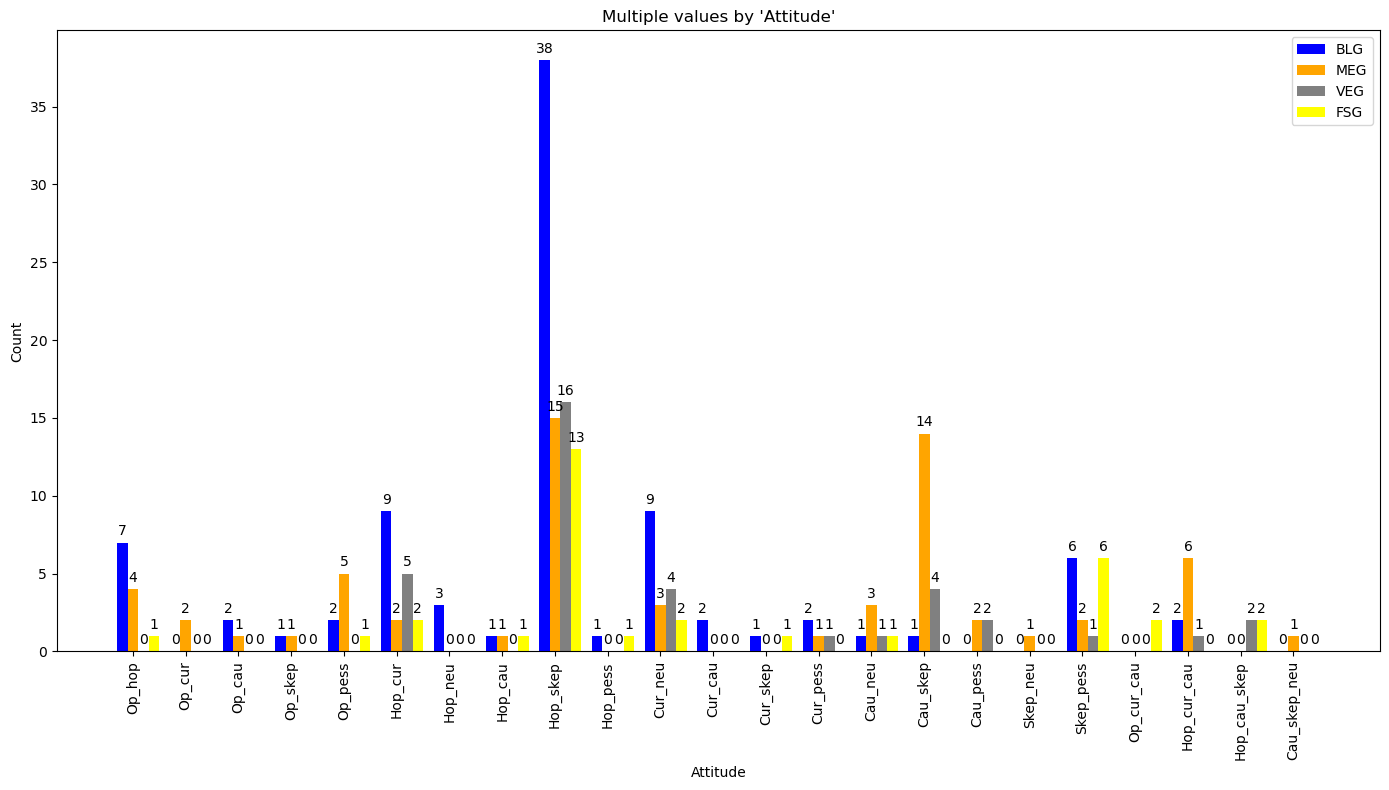

Group,BLG,FSG,MEG,VEG
Attitude,,,,
Cau_neu,7,1,4,0
Cau_pess,0,0,2,0
Cau_skep,2,0,1,0
Cau_skep_neu,1,0,1,0
Cur_cau,2,1,5,0
Cur_neu,9,2,2,5
Cur_pess,3,0,0,0
Cur_skep,1,1,1,0
Hop_cau,38,13,15,16


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Hydrogen dataset.csv"
hydrogen_data = pd.read_csv(file_path)

# Columns of interest
columns_of_interest = [
    'Op_hop', 'Op_cur', 'Op_cau', 'Op_skep', 'Op_pess',
    'Hop_cur', 'Hop_neu', 'Hop_cau', 'Hop_skep', 'Hop_pess',
    'Cur_neu', 'Cur_cau', 'Cur_skep', 'Cur_pess',
    'Cau_neu', 'Cau_skep', 'Cau_pess', 'Skep_neu', 'Skep_pess',
    'Op_cur_cau', 'Hop_cur_cau', 'Hop_cau_skep', 'Cau_skep_neu'
]

# Replace placeholder '.' with NaN
for col in columns_of_interest:
    hydrogen_data[col] = hydrogen_data[col].replace('.', pd.NA)

# Correctly calculate the non-NaN counts for each attitude within each group
group_counts_corrected = []

# Correct the grouping and counting logic
for attitude in columns_of_interest:
    for group, group_name in [(1, 'BLG'), (2, 'MEG'), (3, 'VEG'), (4, 'FSG')]:
        count = hydrogen_data[hydrogen_data['Group'] == group][attitude].notna().sum()
        group_counts_corrected.append({'Attitude': attitude, 'Group': group_name, 'Count': count})

# Create a DataFrame from the corrected counts
group_counts_corrected_df = pd.DataFrame(group_counts_corrected)

# Pivot the DataFrame to a wide format for plotting
group_counts_pivot_corrected = group_counts_corrected_df.pivot(index='Attitude', columns='Group', values='Count').fillna(0)

# Plotting the grouped bar chart with the corrected counts and adding data labels
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.2  # width of the bars

# Create bar positions for each group
x = np.arange(len(columns_of_interest))
positions = [x - width, x, x + width, x + 2 * width]

# Plot bars for each group
bars_blg = ax.bar(positions[0], group_counts_pivot_corrected['BLG'], width=width, label='BLG', color='blue')
bars_meg = ax.bar(positions[1], group_counts_pivot_corrected['MEG'], width=width, label='MEG', color='orange')
bars_veg = ax.bar(positions[2], group_counts_pivot_corrected['VEG'], width=width, label='VEG', color='gray')
bars_fsg = ax.bar(positions[3], group_counts_pivot_corrected['FSG'], width=width, label='FSG', color='yellow')

# Add data labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars_blg)
add_labels(bars_meg)
add_labels(bars_veg)
add_labels(bars_fsg)

# Customize the plot
ax.set_xlabel('Attitude')
ax.set_ylabel('Count')
ax.set_title("Multiple values by 'Attitude'")
ax.set_xticks(x)
ax.set_xticklabels(columns_of_interest, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

# Output the group counts for verification
group_counts_corrected_df_pivot = group_counts_corrected_df.pivot(index='Attitude', columns='Group', values='Count').fillna(0)
group_counts_corrected_df_pivot


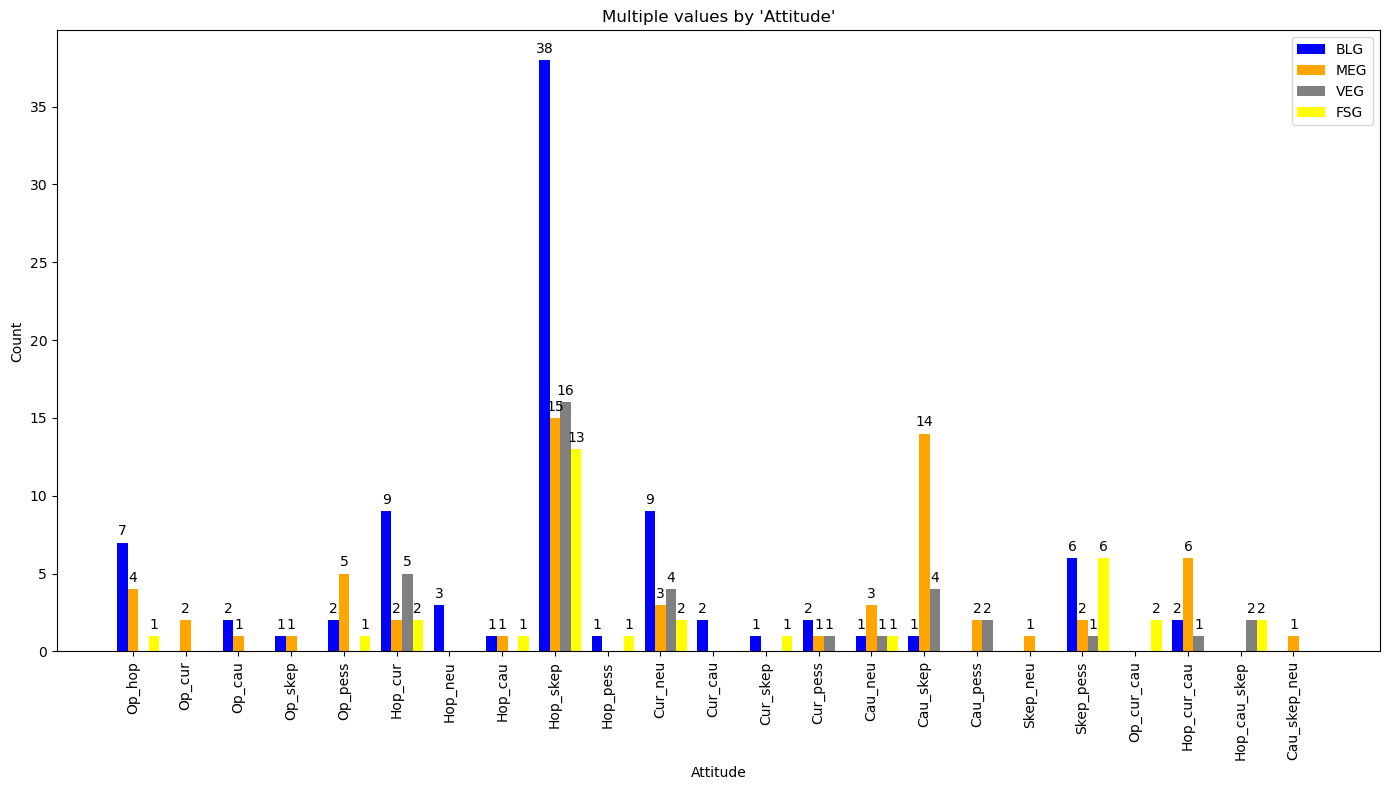

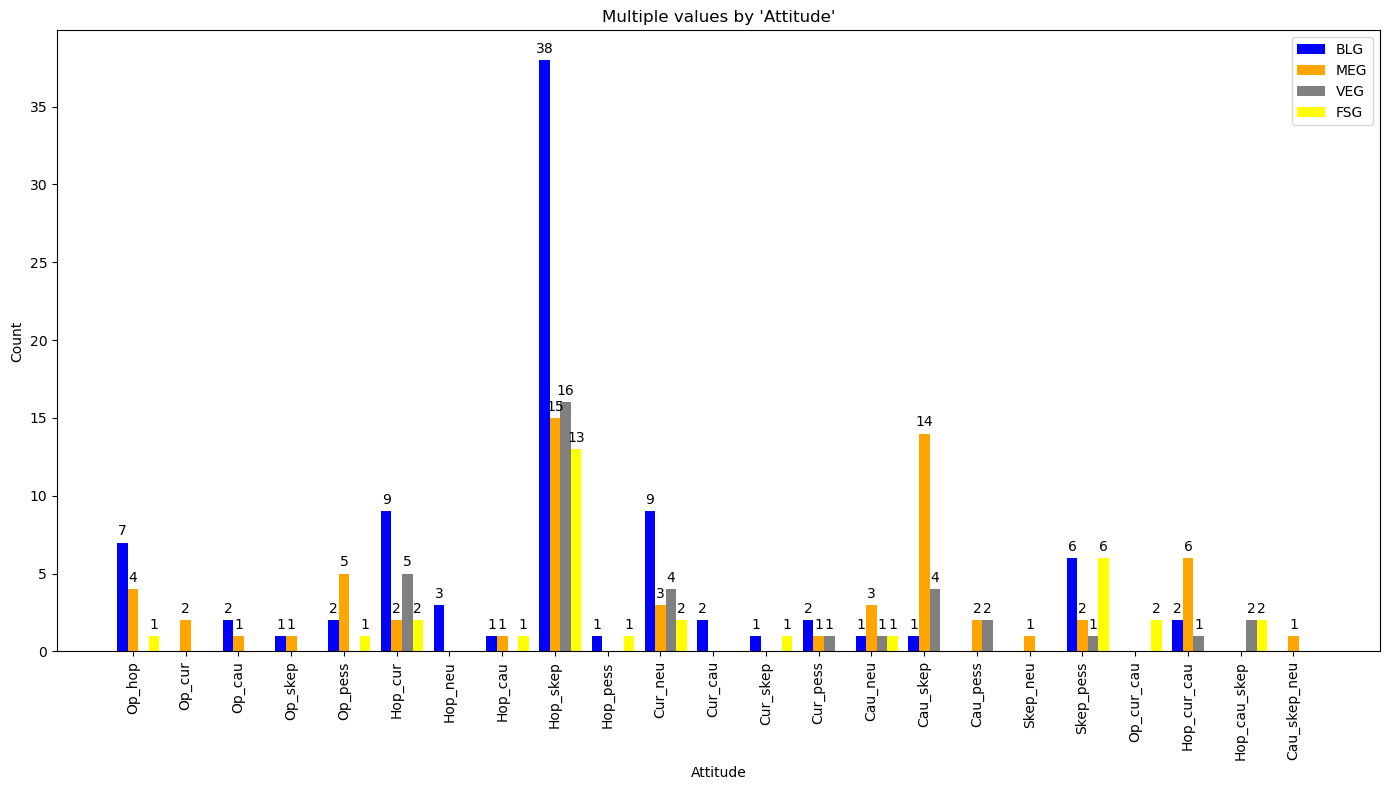

In [15]:
!pip install textblob
!python -m textblob.download_corpora


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - ------------------------------------- 20.5/626.3 kB 640.0 kB/s eta 0:00:01
   ---- ---------------------------------- 71.7/626.3 kB 991.0 kB/s eta 0:00:01
   ------------------------------------- -- 593.9/626.3 kB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.9 MB/s eta 0:00:00
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\nikah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nikah\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nikah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\nikah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\nikah\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


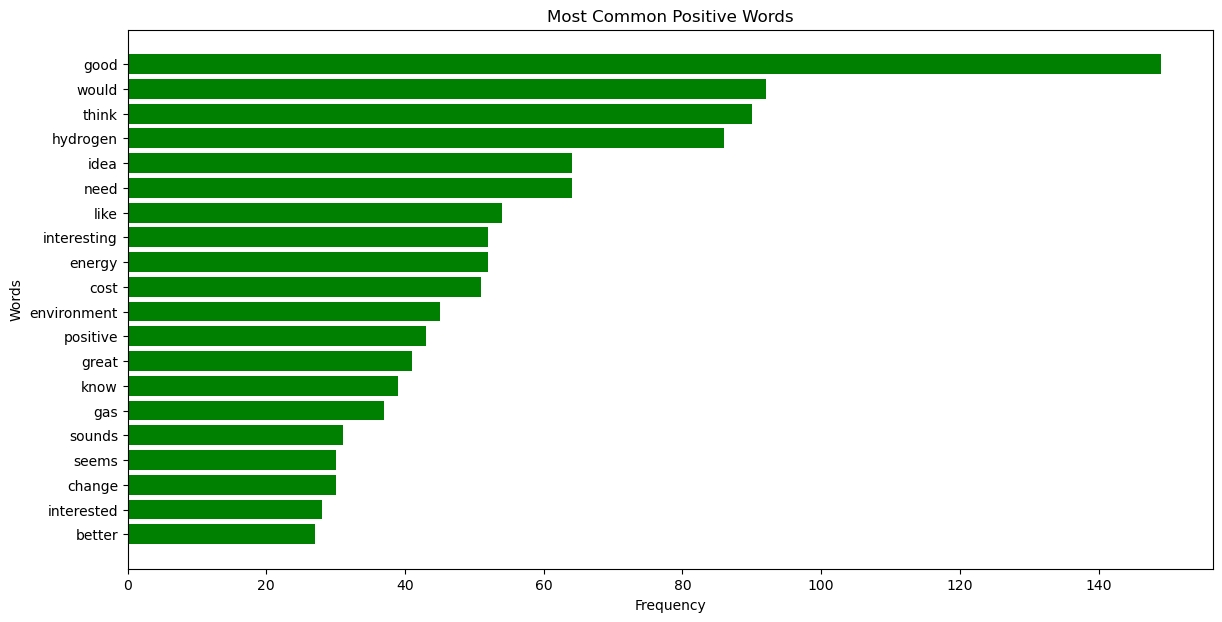

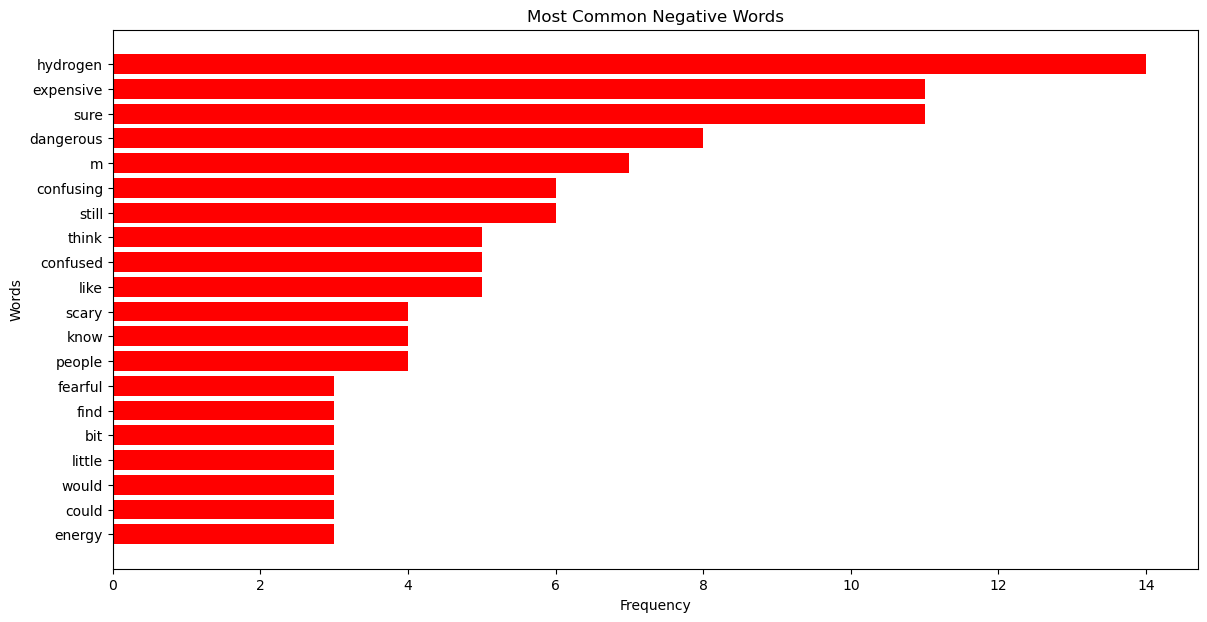

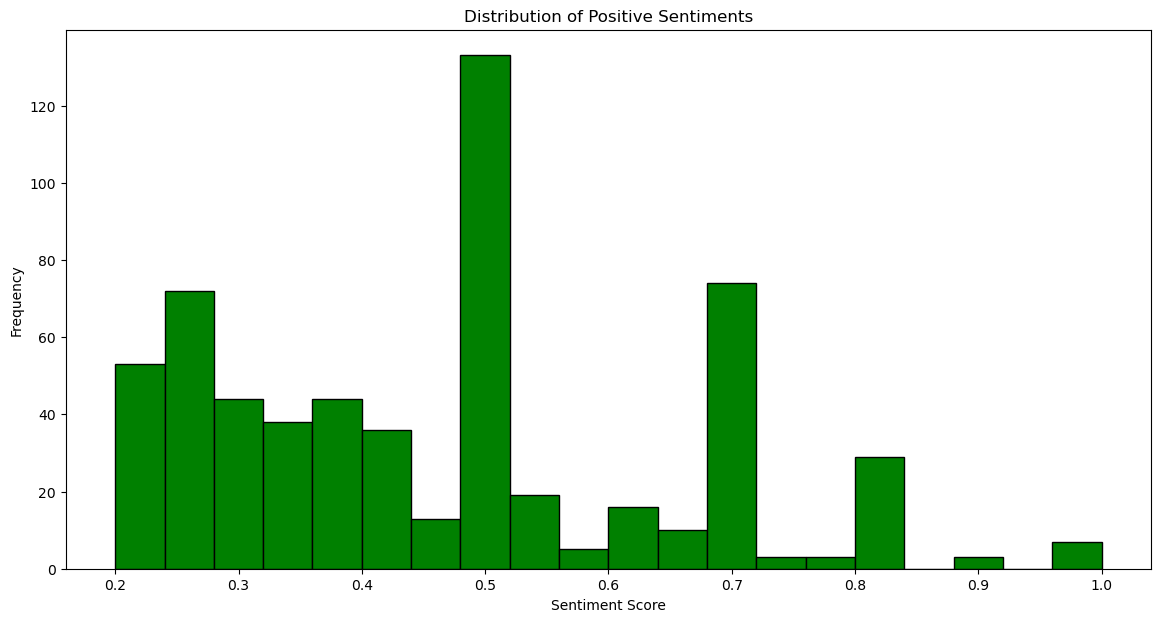

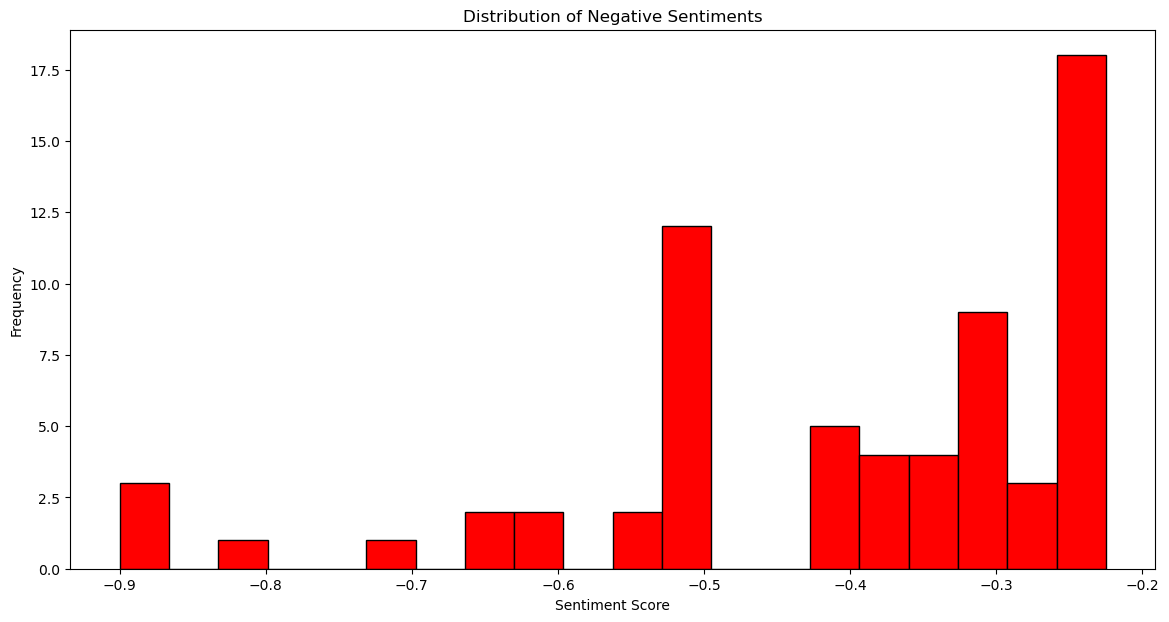

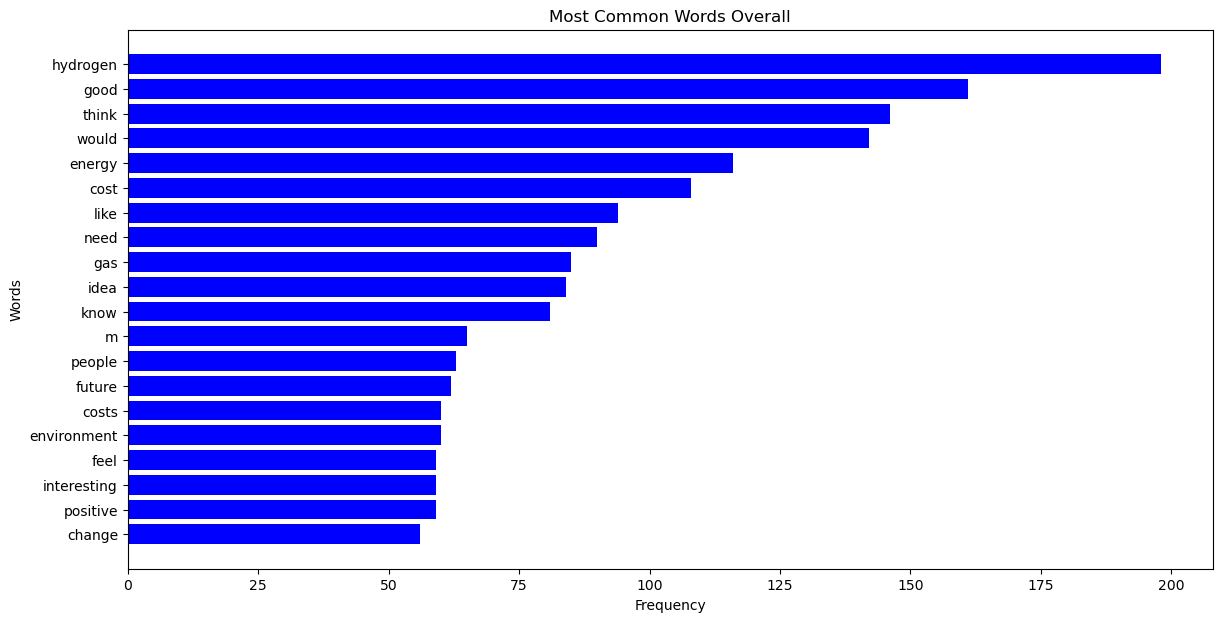

In [16]:
import pandas as pd
from textblob import TextBlob
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Hydrogen dataset.csv"
survey_data = pd.read_csv(file_path)

# Function to get sentiment from text
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the "Statement" column
survey_data['Sentiment'] = survey_data['Statement'].apply(lambda x: get_sentiment(x) if pd.notnull(x) else 0)

# Summary statistics of sentiment
sentiment_summary = survey_data['Sentiment'].describe()

# Manual list of common English stopwords
stop_words_manual = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
    'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in',
    'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
}

# Function to clean and tokenize text without manual stop words
def tokenize_no_stopwords_manual(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-alphanumeric characters
    tokens = text.lower().split()  # Convert to lowercase and split
    filtered_tokens = [word for word in tokens if word not in stop_words_manual]
    return filtered_tokens

# Tokenize all statements without stopwords
all_tokens_no_stopwords_manual = []
for statement in survey_data['Statement'].dropna():
    all_tokens_no_stopwords_manual.extend(tokenize_no_stopwords_manual(statement))

# Get the most common words without stopwords
common_words_no_stopwords_manual = Counter(all_tokens_no_stopwords_manual).most_common(20)

# Analyze positive and negative sentiments
positive_statements = survey_data[survey_data['Sentiment'] > 0.2]
negative_statements = survey_data[survey_data['Sentiment'] < -0.2]

positive_summary = positive_statements['Sentiment'].describe()
negative_summary = negative_statements['Sentiment'].describe()

# Tokenize positive and negative statements without stopwords
positive_tokens_no_stopwords = []
for statement in positive_statements['Statement'].dropna():
    positive_tokens_no_stopwords.extend(tokenize_no_stopwords_manual(statement))

negative_tokens_no_stopwords = []
for statement in negative_statements['Statement'].dropna():
    negative_tokens_no_stopwords.extend(tokenize_no_stopwords_manual(statement))

# Get the most common words without stopwords for positive and negative statements
common_positive_words_no_stopwords = Counter(positive_tokens_no_stopwords).most_common(20)
common_negative_words_no_stopwords = Counter(negative_tokens_no_stopwords).most_common(20)

# Create bar charts for common positive and negative words

# Separate words and their counts for positive and negative sentiments
positive_words, positive_counts = zip(*common_positive_words_no_stopwords)
negative_words, negative_counts = zip(*common_negative_words_no_stopwords)

# Plotting the positive words
plt.figure(figsize=(14, 7))
plt.barh(positive_words, positive_counts, color='green')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Common Positive Words')
plt.gca().invert_yaxis()
plt.show()

# Plotting the negative words
plt.figure(figsize=(14, 7))
plt.barh(negative_words, negative_counts, color='red')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Common Negative Words')
plt.gca().invert_yaxis()
plt.show()

# Create histograms for positive and negative sentiment distributions

# Plotting the positive sentiment distribution
plt.figure(figsize=(14, 7))
plt.hist(positive_statements['Sentiment'], bins=20, color='green', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Positive Sentiments')
plt.show()

# Plotting the negative sentiment distribution
plt.figure(figsize=(14, 7))
plt.hist(negative_statements['Sentiment'], bins=20, color='red', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Negative Sentiments')
plt.show()

# Separate words and their counts for the most common words overall
words, counts = zip(*common_words_no_stopwords_manual)

# Plotting the most common words overall
plt.figure(figsize=(14, 7))
plt.barh(words, counts, color='blue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Common Words Overall')
plt.gca().invert_yaxis()
plt.show()


Overall Sentiment Summary:
count    1213.000000
mean        0.219786
std         0.298920
min        -0.900000
25%         0.000000
50%         0.200000
75%         0.475000
max         1.000000
Name: Sentiment, dtype: float64

Positive Sentiment Summary:
count    602.000000
mean       0.463812
std        0.181995
min        0.200000
25%        0.300000
50%        0.483333
75%        0.558902
max        1.000000
Name: Sentiment, dtype: float64

Negative Sentiment Summary:
count    66.000000
mean     -0.405078
std       0.172379
min      -0.900000
25%      -0.500000
50%      -0.350000
75%      -0.250000
max      -0.225000
Name: Sentiment, dtype: float64


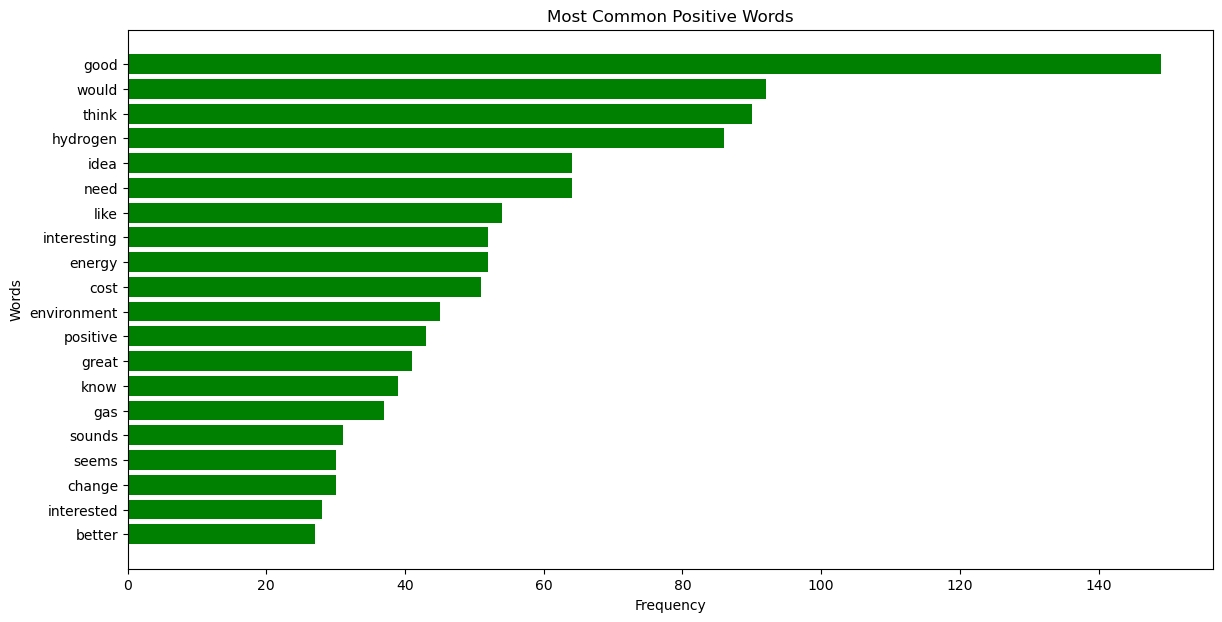

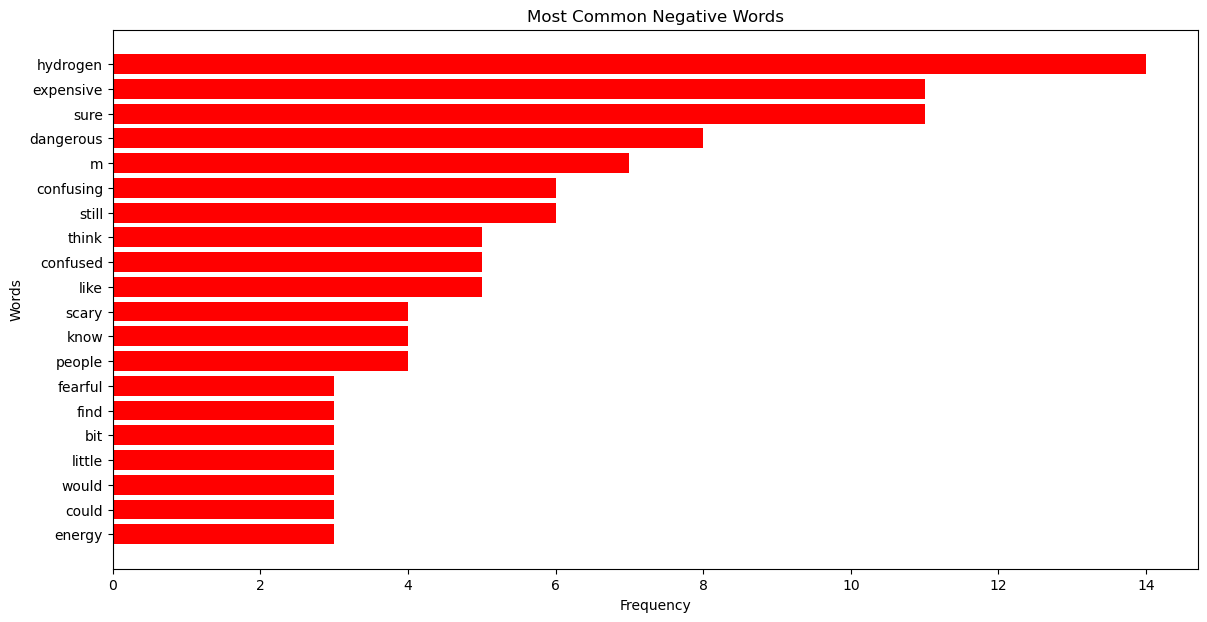

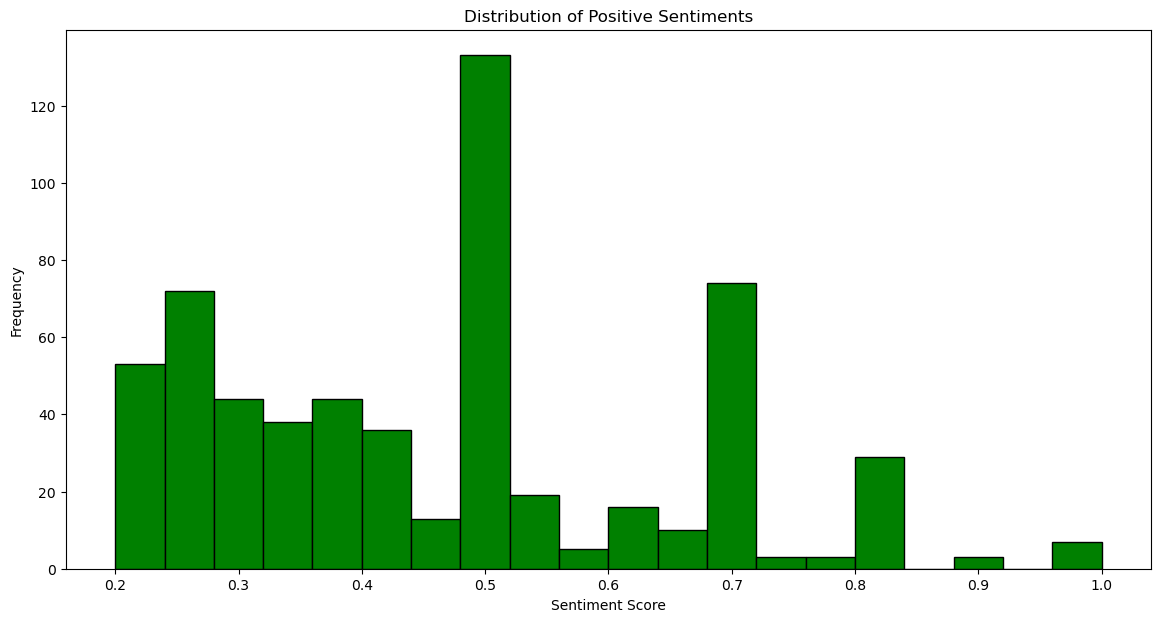

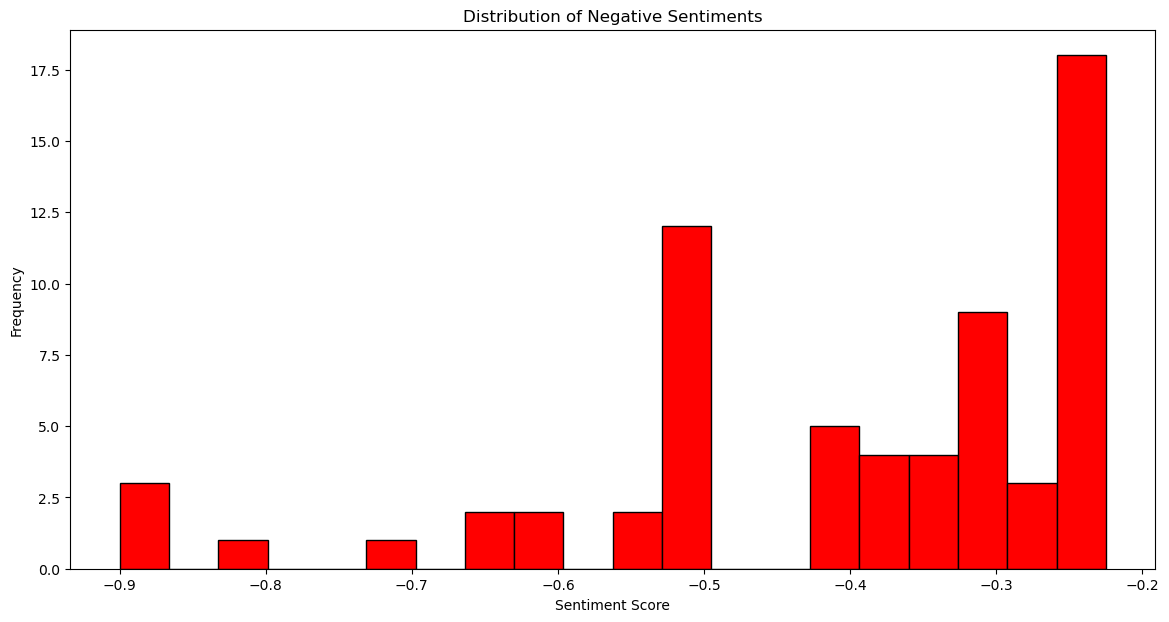

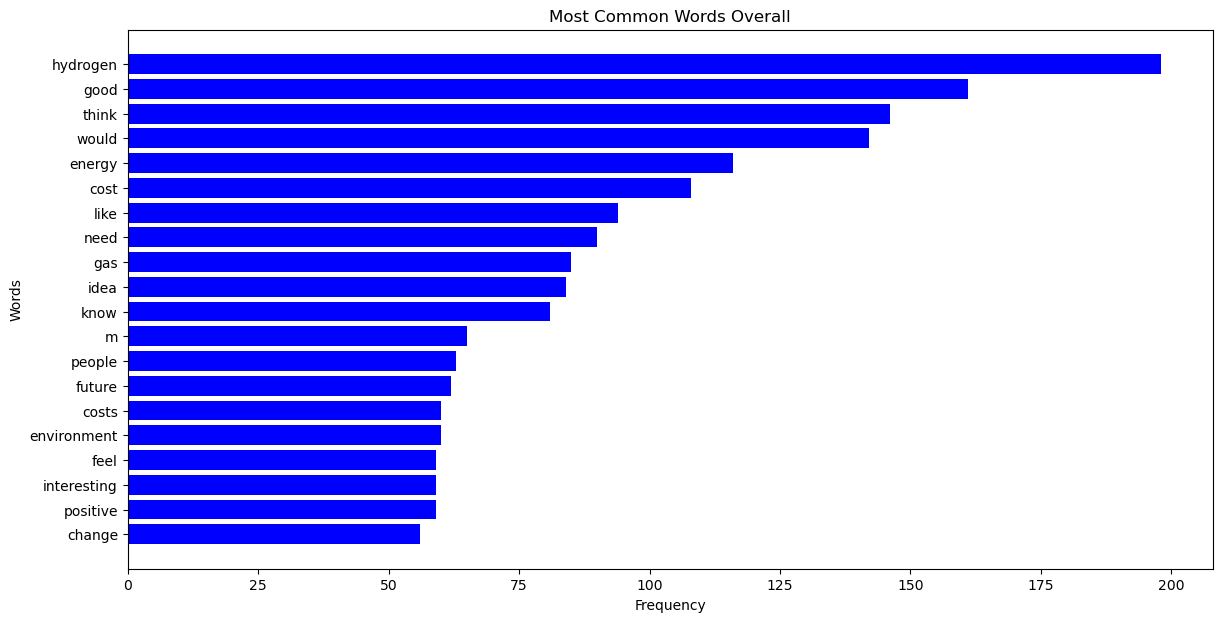

In [17]:
import pandas as pd
from textblob import TextBlob
import re
from collections import Counter
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Hydrogen dataset.csv"
survey_data = pd.read_csv(file_path)

# Function to calculate sentiment score using TextBlob
def get_sentiment(text):
    """
    This function takes a text string as input and returns the sentiment polarity score.
    Sentiment polarity is a float value in the range [-1.0, 1.0]
    where -1.0 indicates very negative sentiment,
    0 indicates neutral sentiment,
    and 1.0 indicates very positive sentiment.
    """
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis to the "Statement" column
# We apply the get_sentiment function to each statement in the dataset
survey_data['Sentiment'] = survey_data['Statement'].apply(lambda x: get_sentiment(x) if pd.notnull(x) else 0)

# Summary statistics of sentiment
sentiment_summary = survey_data['Sentiment'].describe()

# Manual list of common English stopwords
stop_words_manual = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
    'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
    'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in',
    'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
}

# Function to clean and tokenize text without manual stop words
def tokenize_no_stopwords_manual(text):
    """
    This function removes non-alphanumeric characters from the text,
    converts the text to lowercase,
    and splits the text into words (tokens).
    It then filters out common English stopwords.
    """
    text = re.sub(r'\W+', ' ', text)  # Remove non-alphanumeric characters
    tokens = text.lower().split()  # Convert to lowercase and split
    filtered_tokens = [word for word in tokens if word not in stop_words_manual]
    return filtered_tokens

# Tokenize all statements without stopwords
all_tokens_no_stopwords_manual = []
for statement in survey_data['Statement'].dropna():
    all_tokens_no_stopwords_manual.extend(tokenize_no_stopwords_manual(statement))

# Get the most common words without stopwords
common_words_no_stopwords_manual = Counter(all_tokens_no_stopwords_manual).most_common(20)

# Analyze positive and negative sentiments
positive_statements = survey_data[survey_data['Sentiment'] > 0.2]
negative_statements = survey_data[survey_data['Sentiment'] < -0.2]

positive_summary = positive_statements['Sentiment'].describe()
negative_summary = negative_statements['Sentiment'].describe()

# Display sentiment summaries
print("Overall Sentiment Summary:")
print(sentiment_summary)
print("\nPositive Sentiment Summary:")
print(positive_summary)
print("\nNegative Sentiment Summary:")
print(negative_summary)

# Tokenize positive and negative statements without stopwords
positive_tokens_no_stopwords = []
for statement in positive_statements['Statement'].dropna():
    positive_tokens_no_stopwords.extend(tokenize_no_stopwords_manual(statement))

negative_tokens_no_stopwords = []
for statement in negative_statements['Statement'].dropna():
    negative_tokens_no_stopwords.extend(tokenize_no_stopwords_manual(statement))

# Get the most common words without stopwords for positive and negative statements
common_positive_words_no_stopwords = Counter(positive_tokens_no_stopwords).most_common(20)
common_negative_words_no_stopwords = Counter(negative_tokens_no_stopwords).most_common(20)

# Create bar charts for common positive and negative words

# Separate words and their counts for positive and negative sentiments
positive_words, positive_counts = zip(*common_positive_words_no_stopwords)
negative_words, negative_counts = zip(*common_negative_words_no_stopwords)

# Plotting the positive words
plt.figure(figsize=(14, 7))
plt.barh(positive_words, positive_counts, color='green')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Common Positive Words')
plt.gca().invert_yaxis()
plt.show()

# Plotting the negative words
plt.figure(figsize=(14, 7))
plt.barh(negative_words, negative_counts, color='red')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Common Negative Words')
plt.gca().invert_yaxis()
plt.show()

# Create histograms for positive and negative sentiment distributions

# Plotting the positive sentiment distribution
plt.figure(figsize=(14, 7))
plt.hist(positive_statements['Sentiment'], bins=20, color='green', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Positive Sentiments')
plt.show()

# Plotting the negative sentiment distribution
plt.figure(figsize=(14, 7))
plt.hist(negative_statements['Sentiment'], bins=20, color='red', edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Negative Sentiments')
plt.show()

# Separate words and their counts for the most common words overall
words, counts = zip(*common_words_no_stopwords_manual)

# Plotting the most common words overall
plt.figure(figsize=(14, 7))
plt.barh(words, counts, color='blue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Common Words Overall')
plt.gca().invert_yaxis()
plt.show()


       Know_recoded  Composite_adoption  BoilerWilling   HobWilling  \
count   1213.000000         1213.000000    1213.000000  1213.000000   
mean       2.006595            2.905169       2.913438     2.877988   
std        0.911038            0.956500       1.071654     1.073973   
min        1.000000            1.000000       1.000000     1.000000   
25%        1.000000            2.000000       2.000000     2.000000   
50%        2.000000            3.000000       3.000000     3.000000   
75%        3.000000            3.670000       4.000000     4.000000   
max        4.000000            5.000000       5.000000     7.000000   

       H2homeWilling  
count    1213.000000  
mean        2.924155  
std         1.061252  
min         1.000000  
25%         2.000000  
50%         3.000000  
75%         4.000000  
max         5.000000  


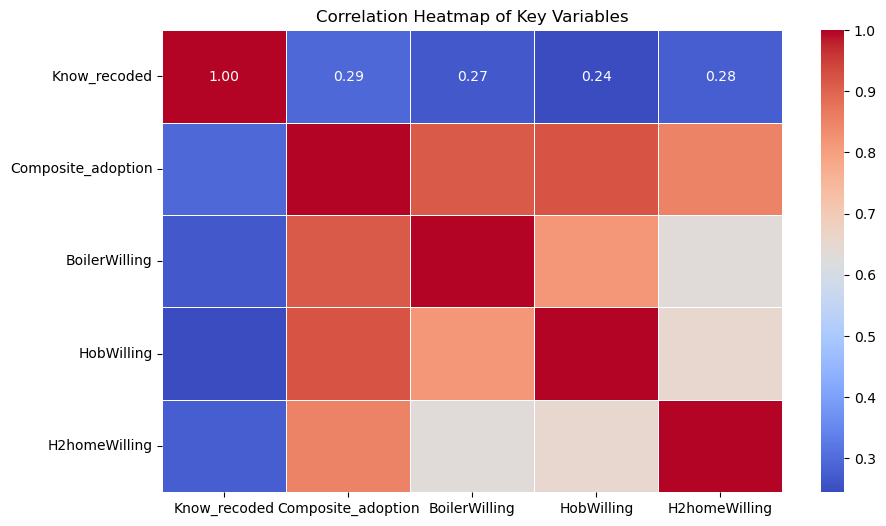

Regression results for Composite_adoption:

                            OLS Regression Results                            
Dep. Variable:     Composite_adoption   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     113.3
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           2.31e-25
Time:                        15:14:11   Log-Likelihood:                -1612.5
No. Observations:                1213   AIC:                             3229.
Df Residuals:                    1211   BIC:                             3239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cons

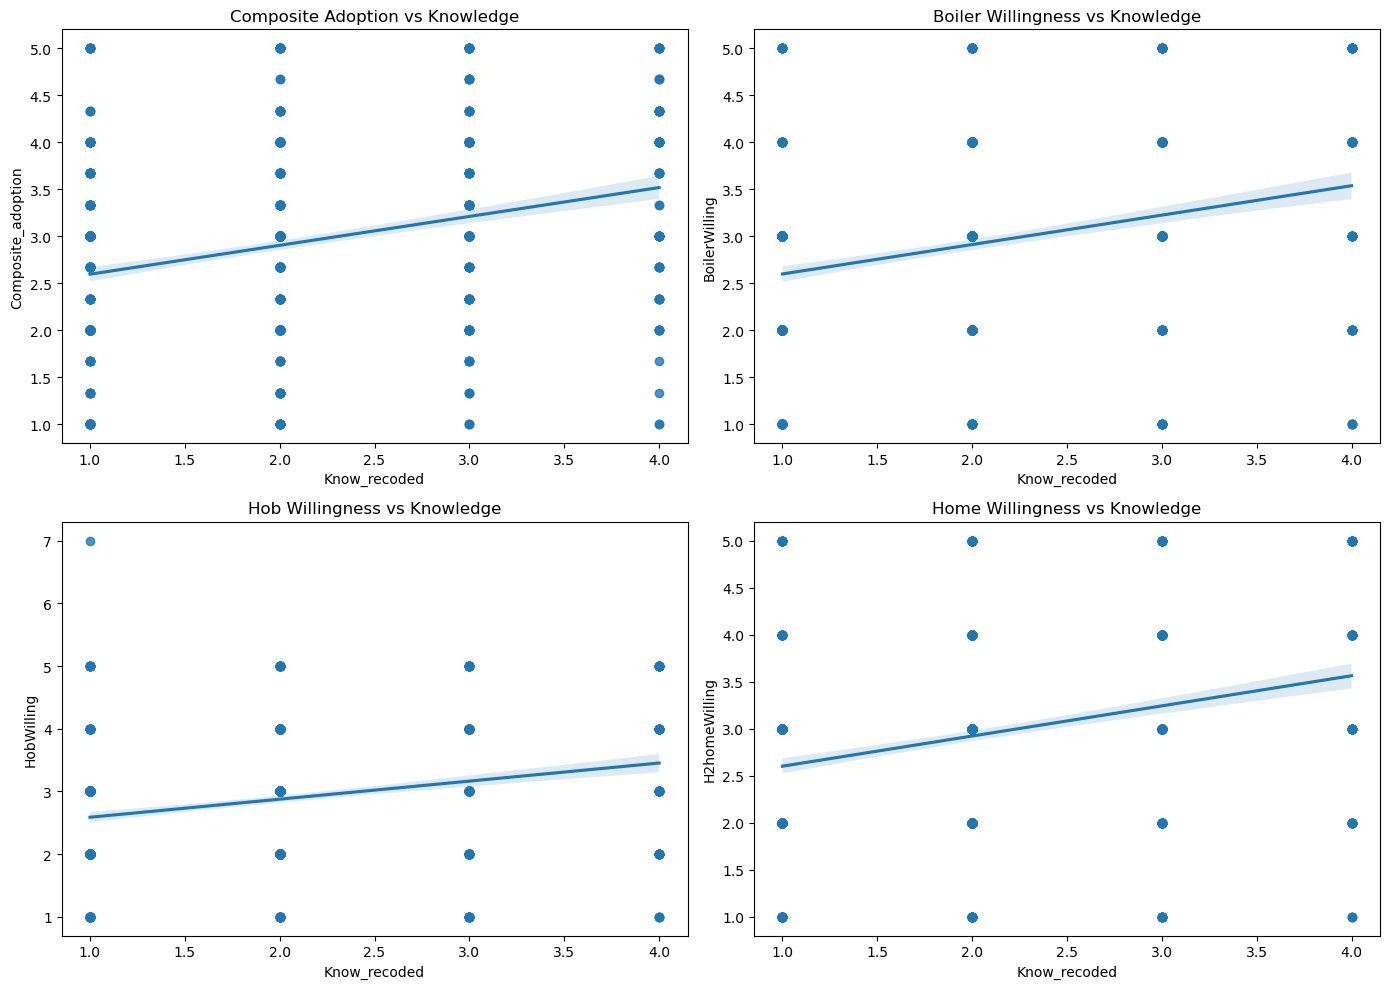

In [24]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset
file_path = "Hydrogen dataset.csv"
data = pd.read_csv(file_path)

# Extract relevant columns
key_columns = ['Know_recoded', 'Composite_adoption', 'BoilerWilling', 'HobWilling', 'H2homeWilling']
key_data = data[key_columns]

# Convert columns to numeric if they are not already
key_data = key_data.apply(pd.to_numeric, errors='coerce')

# Descriptive Statistics
summary_statistics = key_data.describe()
print(summary_statistics)

# Correlation Analysis
correlation_matrix = key_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

# Regression Analysis
X = key_data['Know_recoded']
X = sm.add_constant(X)  # adding a constant

regression_results = {}

for col in ['Composite_adoption', 'BoilerWilling', 'HobWilling', 'H2homeWilling']:
    Y = key_data[col]
    model = sm.OLS(Y, X).fit()
    regression_results[col] = model.summary()

# Display regression results for each adoption variable
for key, result in regression_results.items():
    print(f"Regression results for {key}:\n")
    print(result)
    print("\n")

# Visualization of relationships
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Composite_adoption vs Know_recoded
sns.regplot(ax=axes[0, 0], x='Know_recoded', y='Composite_adoption', data=key_data)
axes[0, 0].set_title('Composite Adoption vs Knowledge')

# BoilerWilling vs Know_recoded
sns.regplot(ax=axes[0, 1], x='Know_recoded', y='BoilerWilling', data=key_data)
axes[0, 1].set_title('Boiler Willingness vs Knowledge')

# HobWilling vs Know_recoded
sns.regplot(ax=axes[1, 0], x='Know_recoded', y='HobWilling', data=key_data)
axes[1, 0].set_title('Hob Willingness vs Knowledge')

# H2homeWilling vs Know_recoded
sns.regplot(ax=axes[1, 1], x='Know_recoded', y='H2homeWilling', data=key_data)
axes[1, 1].set_title('Home Willingness vs Knowledge')

# Adjust layout
plt.tight_layout()
plt.show()


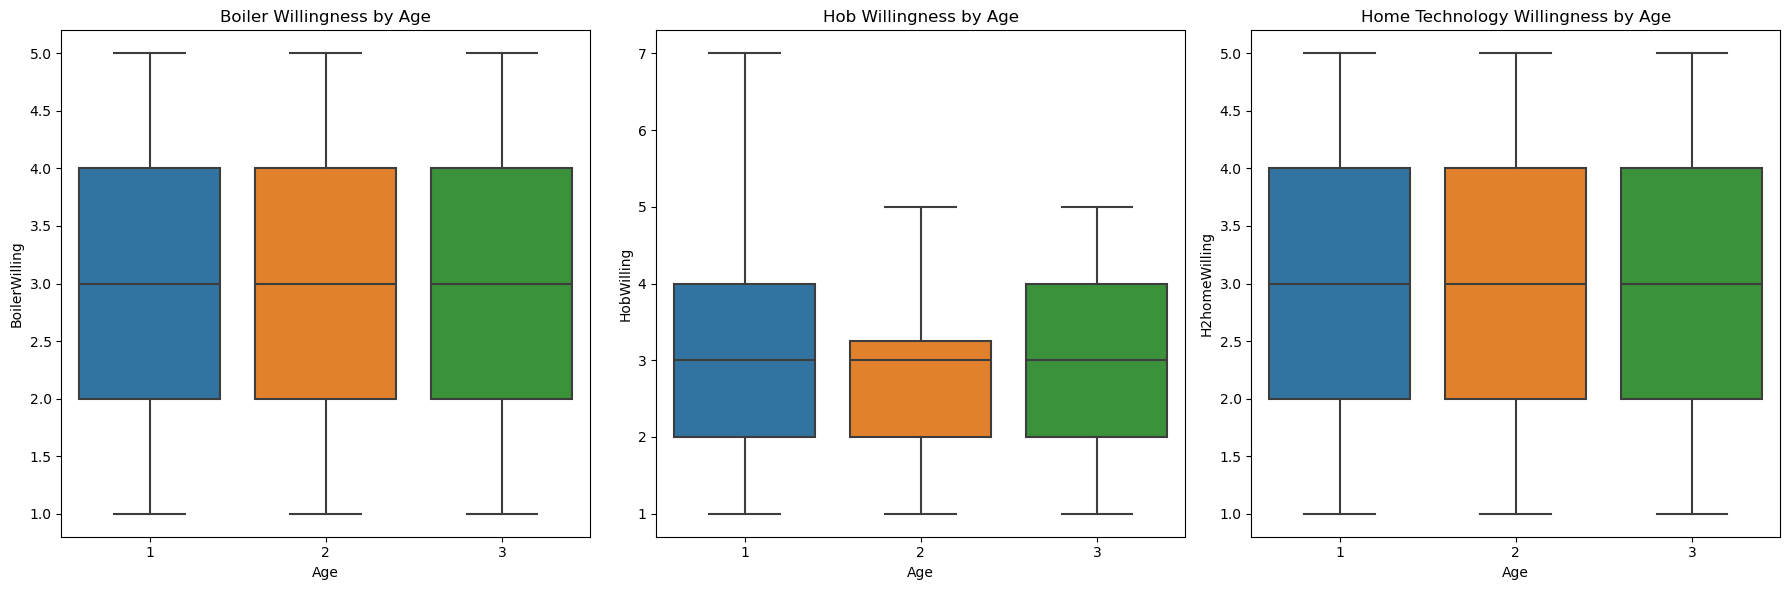

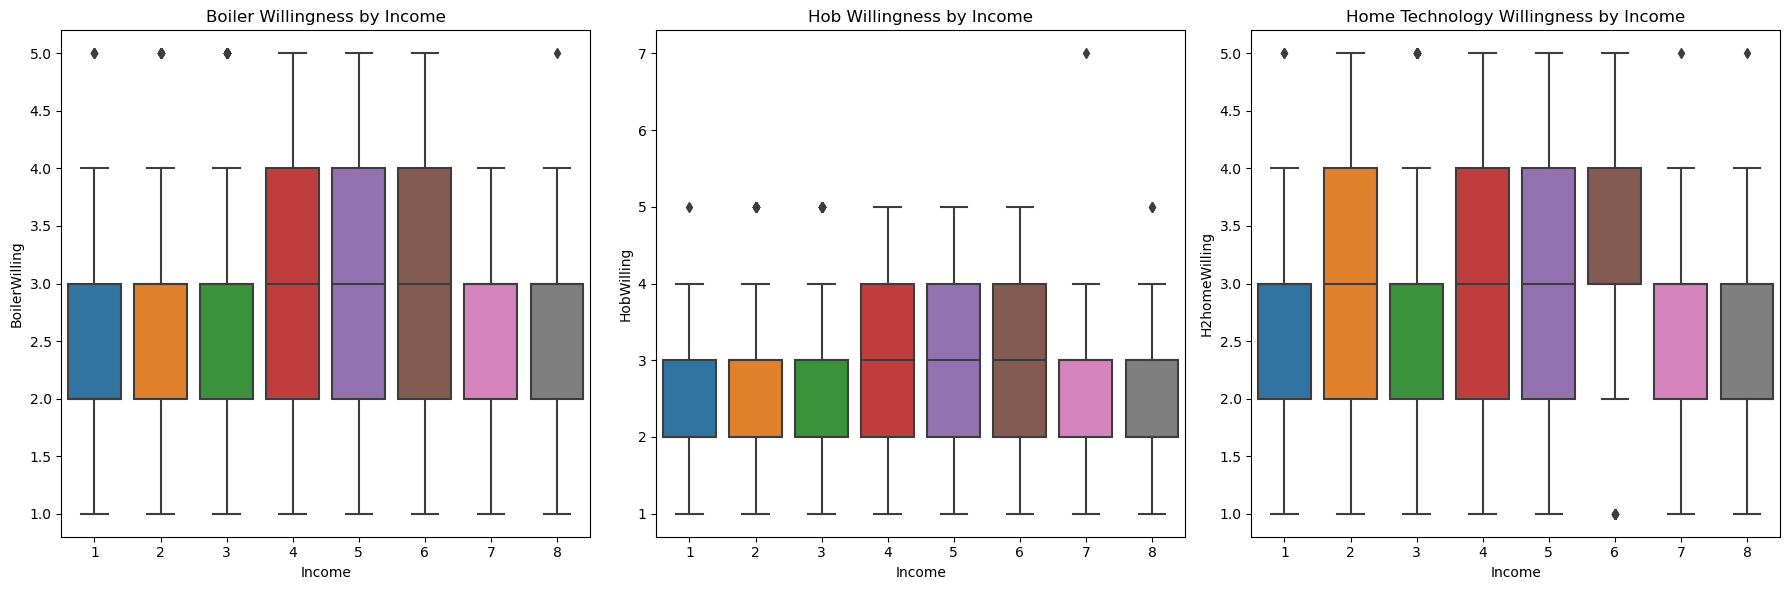

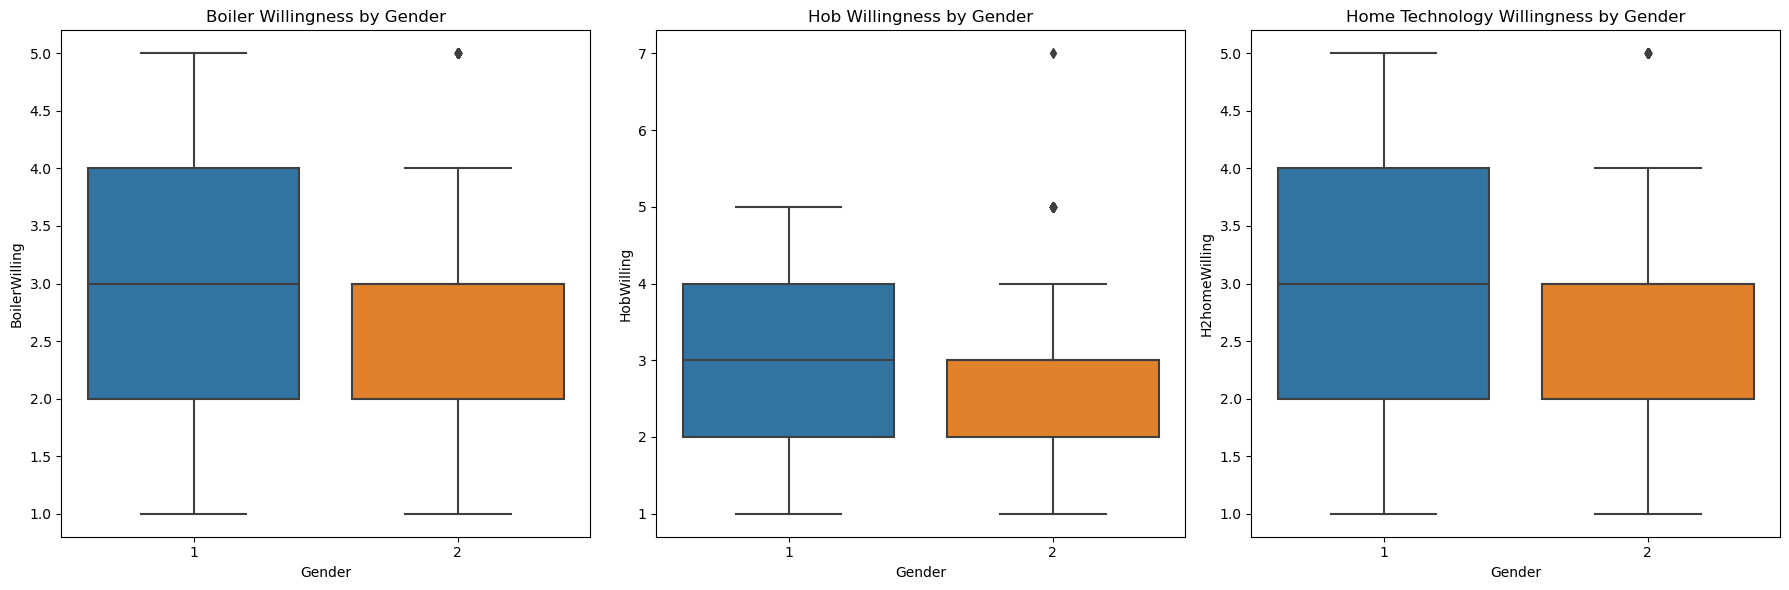

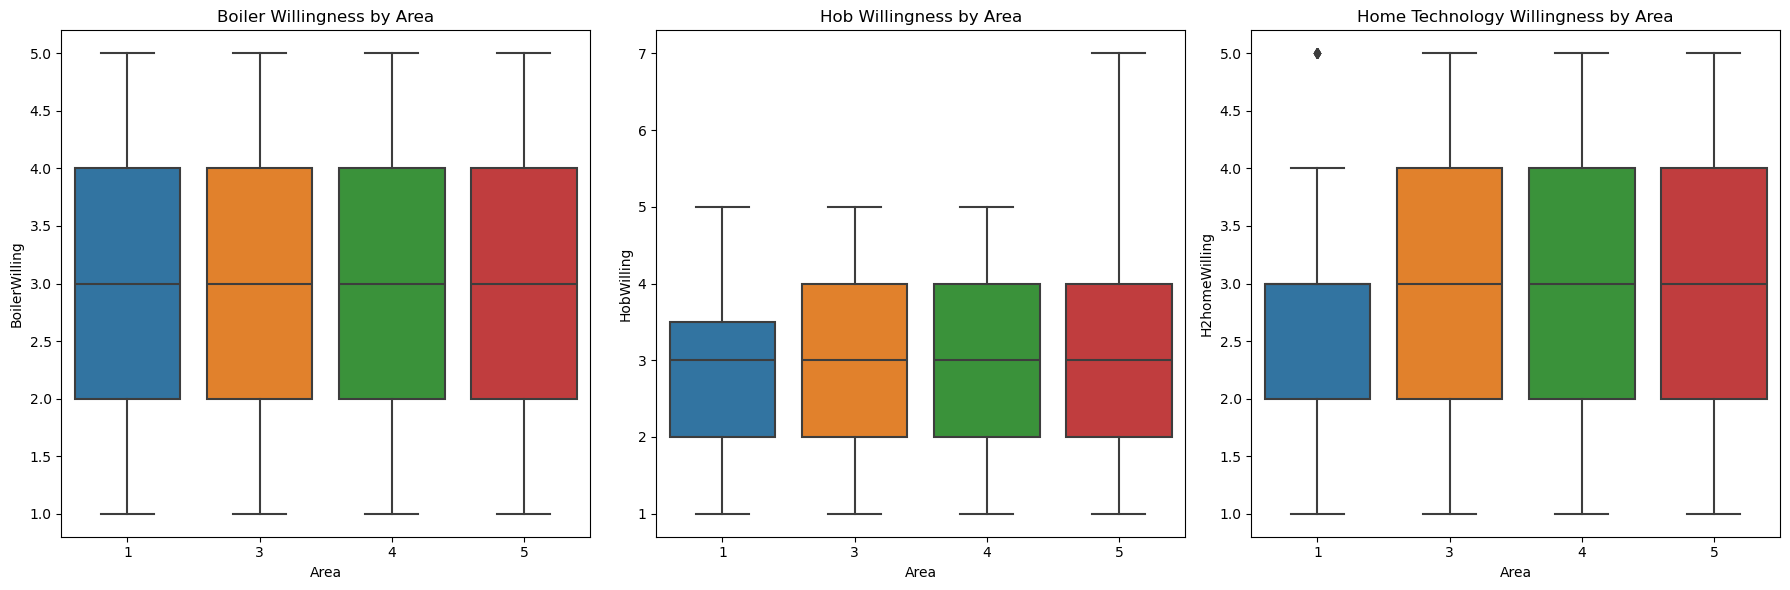

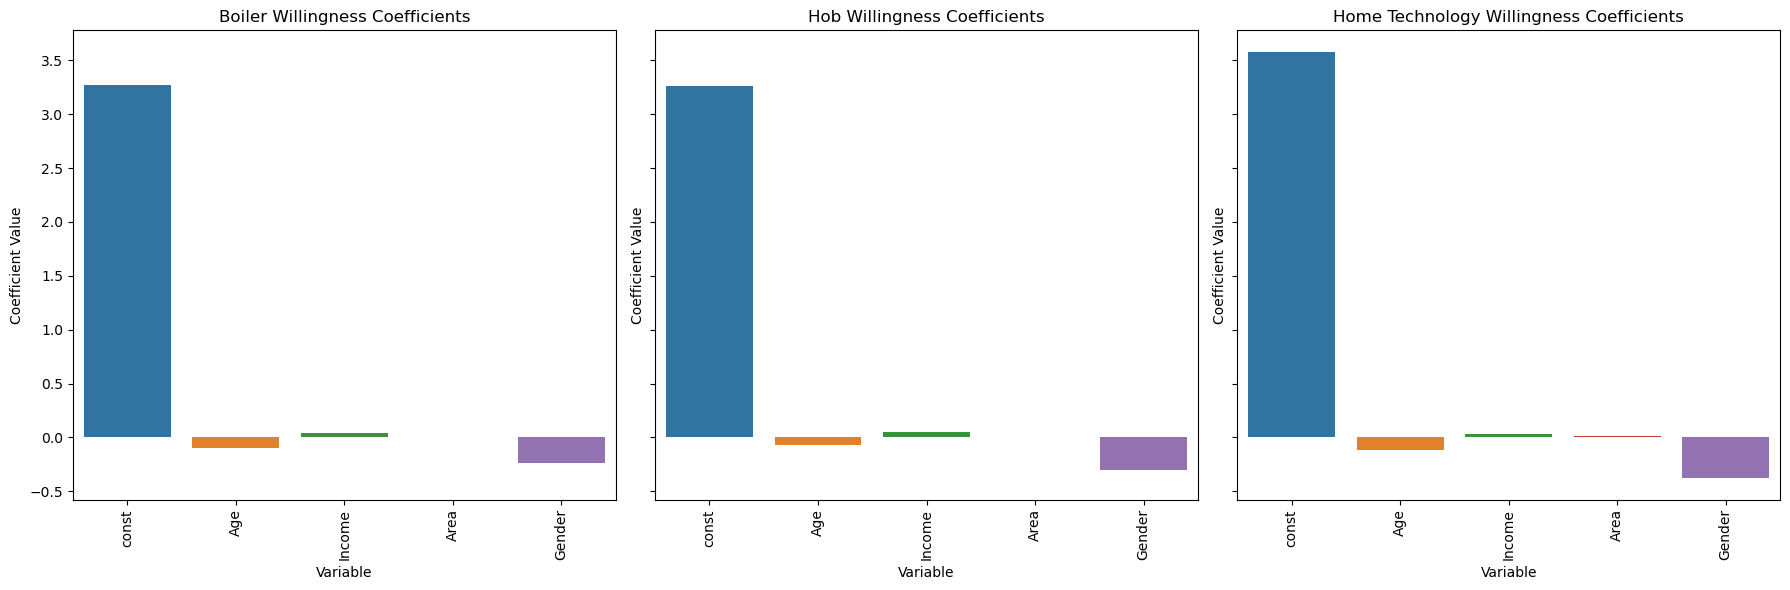

ModuleNotFoundError: No module named 'ace_tools'

In [25]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Load the dataset
file_path = "Hydrogen dataset.csv"
hydrogen_data = pd.read_csv(file_path)

# Define the predictors and add a constant term
predictors = ['Age', 'Income', 'Area', 'Gender']
X = hydrogen_data[predictors]
X = sm.add_constant(X)

# Define the response variables
y_boiler = hydrogen_data['BoilerWilling']
y_hob = hydrogen_data['HobWilling']
y_home = hydrogen_data['H2homeWilling']

# Perform the regression analysis for each response variable
model_boiler = sm.OLS(y_boiler, X).fit()
model_hob = sm.OLS(y_hob, X).fit()
model_home = sm.OLS(y_home, X).fit()

# Summarize the regression results
summary_boiler = model_boiler.summary()
summary_hob = model_hob.summary()
summary_home = model_home.summary()

# Calculate descriptive statistics
descriptive_stats = hydrogen_data[predictors].describe()

# Perform ANOVA tests for each combination of willingness score and demographic variable
anova_results = {}
for col in predictors:
    anova_results[col] = {
        'BoilerWilling': f_oneway(*[group['BoilerWilling'].dropna() for name, group in hydrogen_data.groupby(col)]),
        'HobWilling': f_oneway(*[group['HobWilling'].dropna() for name, group in hydrogen_data.groupby(col)]),
        'H2homeWilling': f_oneway(*[group['H2homeWilling'].dropna() for name, group in hydrogen_data.groupby(col)])
    }

# Create visualizations

# Boxplots for Willingness Scores by Age
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Age', y='BoilerWilling', data=hydrogen_data, ax=axes[0])
axes[0].set_title('Boiler Willingness by Age')
sns.boxplot(x='Age', y='HobWilling', data=hydrogen_data, ax=axes[1])
axes[1].set_title('Hob Willingness by Age')
sns.boxplot(x='Age', y='H2homeWilling', data=hydrogen_data, ax=axes[2])
axes[2].set_title('Home Technology Willingness by Age')
plt.tight_layout()
plt.show()

# Boxplots for Willingness Scores by Income
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Income', y='BoilerWilling', data=hydrogen_data, ax=axes[0])
axes[0].set_title('Boiler Willingness by Income')
sns.boxplot(x='Income', y='HobWilling', data=hydrogen_data, ax=axes[1])
axes[1].set_title('Hob Willingness by Income')
sns.boxplot(x='Income', y='H2homeWilling', data=hydrogen_data, ax=axes[2])
axes[2].set_title('Home Technology Willingness by Income')
plt.tight_layout()
plt.show()

# Boxplots for Willingness Scores by Gender
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Gender', y='BoilerWilling', data=hydrogen_data, ax=axes[0])
axes[0].set_title('Boiler Willingness by Gender')
sns.boxplot(x='Gender', y='HobWilling', data=hydrogen_data, ax=axes[1])
axes[1].set_title('Hob Willingness by Gender')
sns.boxplot(x='Gender', y='H2homeWilling', data=hydrogen_data, ax=axes[2])
axes[2].set_title('Home Technology Willingness by Gender')
plt.tight_layout()
plt.show()

# Boxplots for Willingness Scores by Area
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Area', y='BoilerWilling', data=hydrogen_data, ax=axes[0])
axes[0].set_title('Boiler Willingness by Area')
sns.boxplot(x='Area', y='HobWilling', data=hydrogen_data, ax=axes[1])
axes[1].set_title('Hob Willingness by Area')
sns.boxplot(x='Area', y='H2homeWilling', data=hydrogen_data, ax=axes[2])
axes[2].set_title('Home Technology Willingness by Area')
plt.tight_layout()
plt.show()

# Extract coefficients from the regression models
coefficients = {
    'BoilerWilling': model_boiler.params,
    'HobWilling': model_hob.params,
    'H2homeWilling': model_home.params
}

# Create a dataframe for visualization
coeff_df = pd.DataFrame(coefficients).reset_index().rename(columns={'index': 'Variable'})

# Plot bar plots for each hydrogen technology
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.barplot(x='Variable', y='BoilerWilling', data=coeff_df, ax=axes[0])
axes[0].set_title('Boiler Willingness Coefficients')
axes[0].set_ylabel('Coefficient Value')
axes[0].set_xlabel('Variable')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(x='Variable', y='HobWilling', data=coeff_df, ax=axes[1])
axes[1].set_title('Hob Willingness Coefficients')
axes[1].set_ylabel('Coefficient Value')
axes[1].set_xlabel('Variable')
axes[1].tick_params(axis='x', rotation=90)

sns.barplot(x='Variable', y='H2homeWilling', data=coeff_df, ax=axes[2])
axes[2].set_title('Home Technology Willingness Coefficients')
axes[2].set_ylabel('Coefficient Value')
axes[2].set_xlabel('Variable')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Output results for the user
import ace_tools as tools; tools.display_dataframe_to_user(name="Descriptive Statistics", dataframe=descriptive_stats)

anova_results, summary_boiler, summary_hob, summary_home


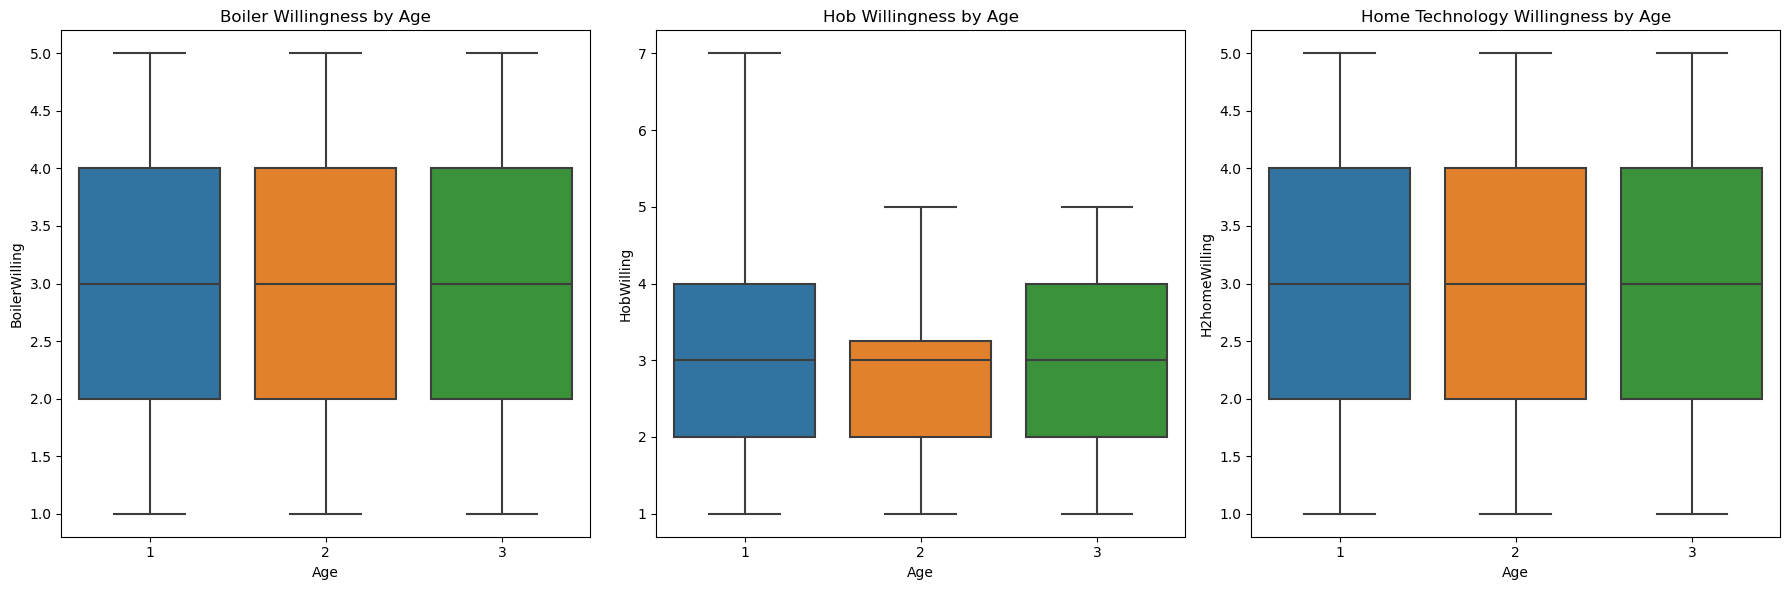

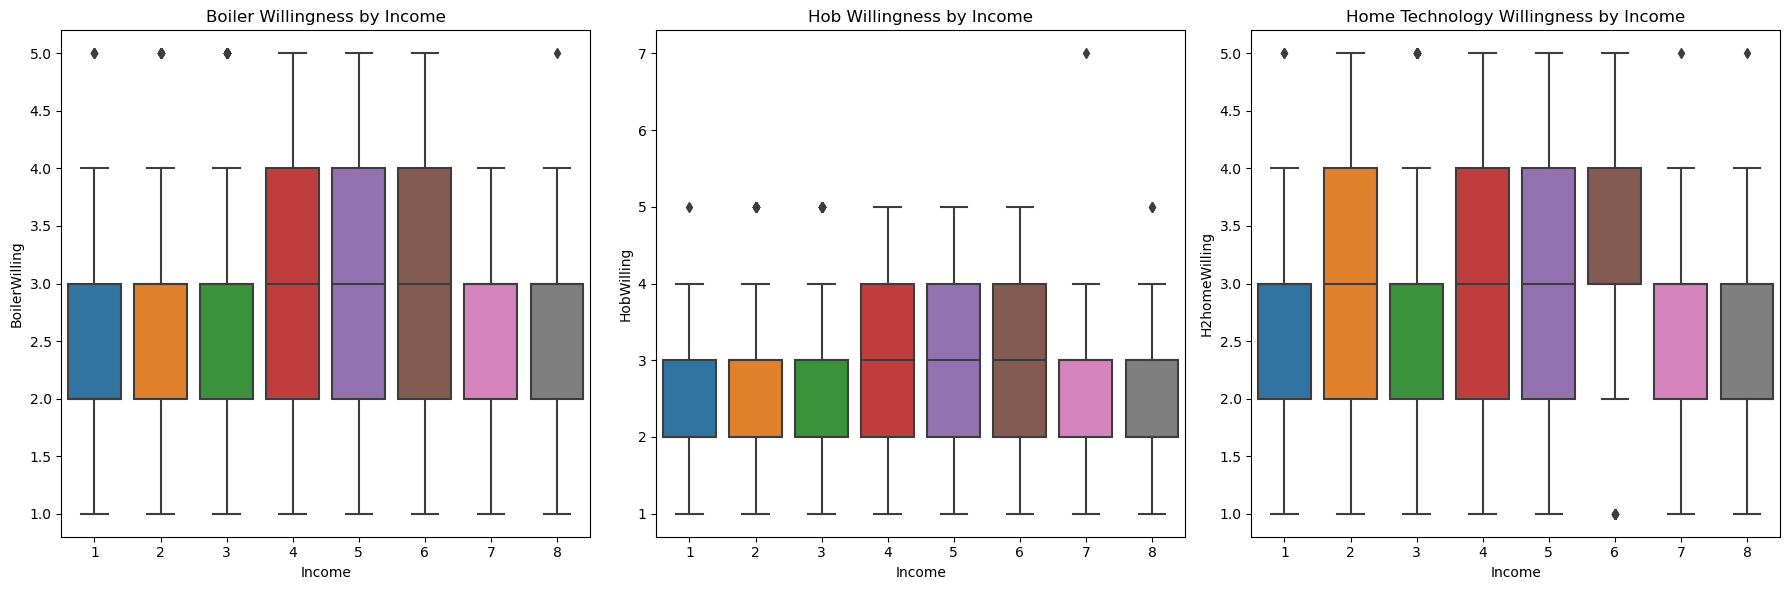

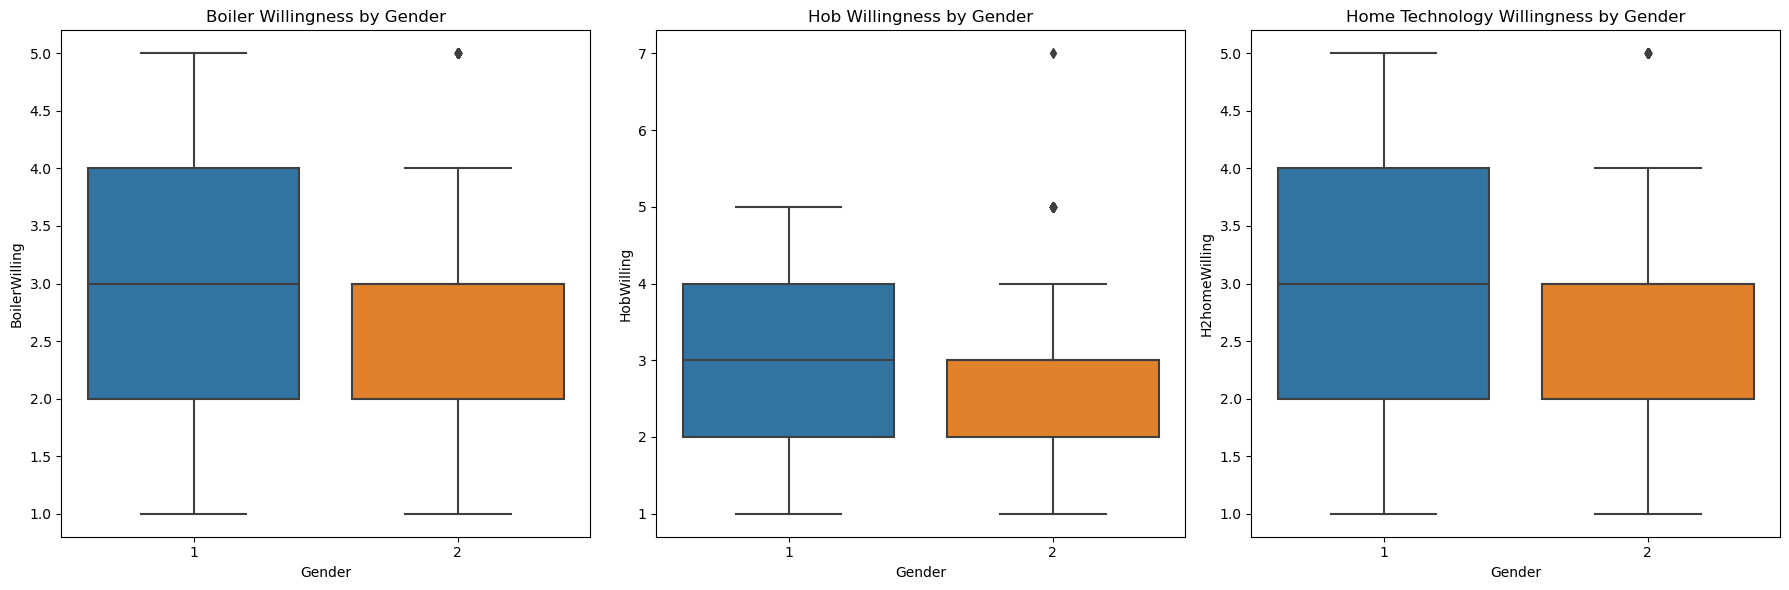

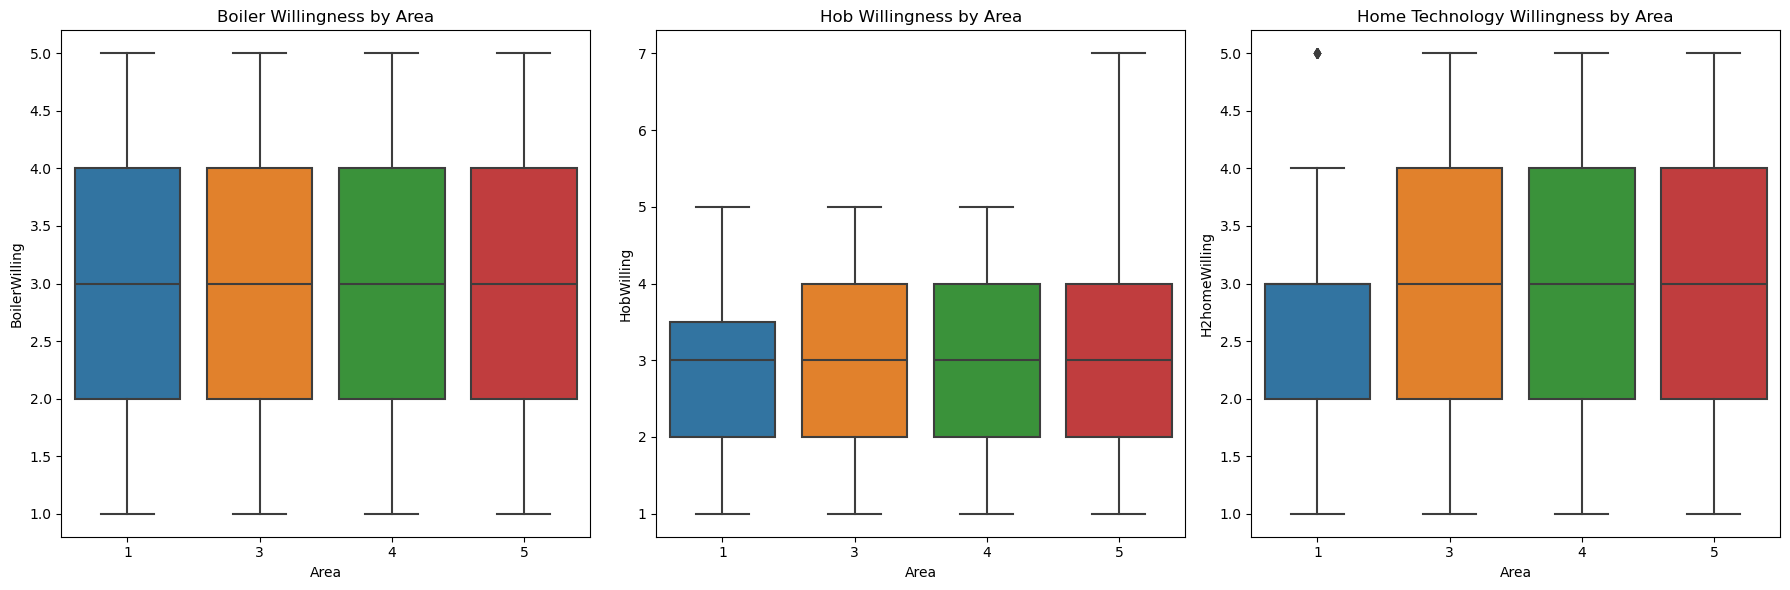

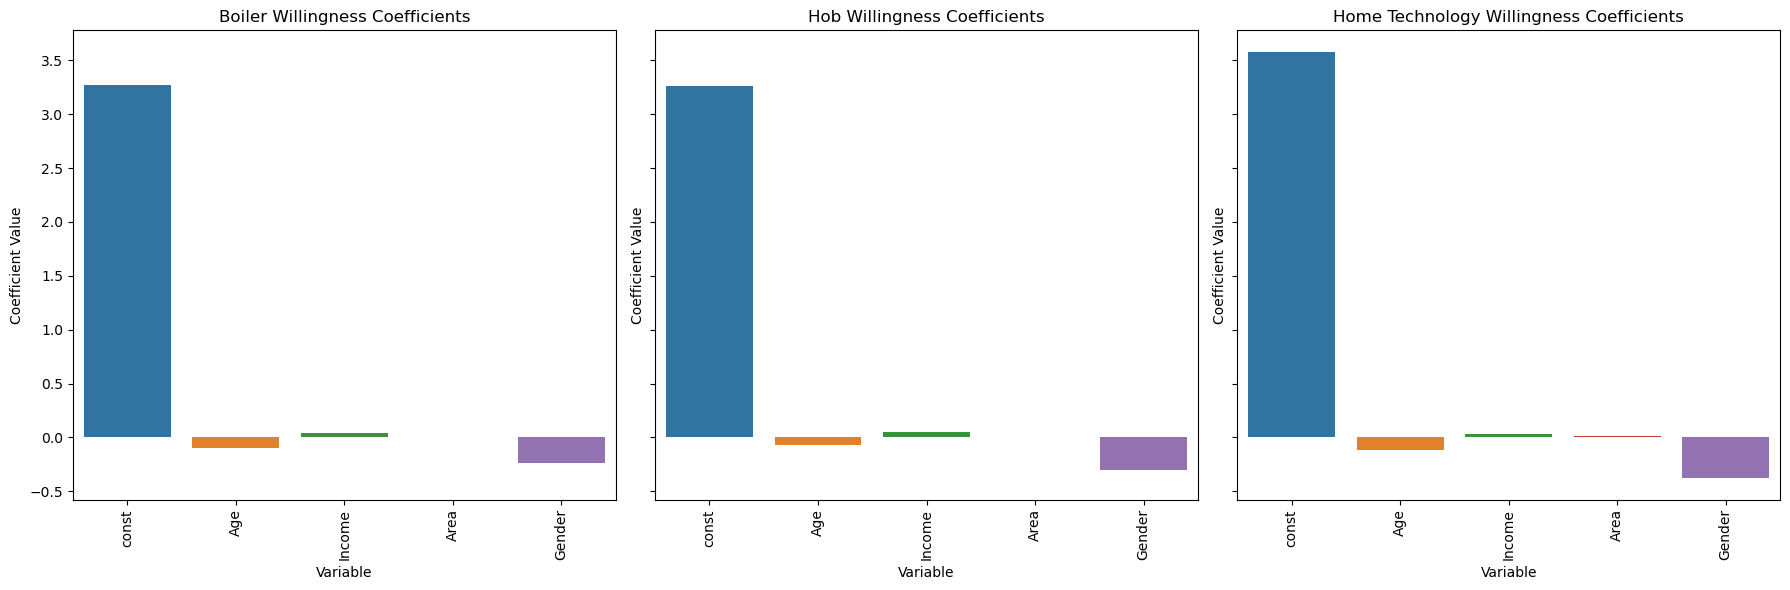

Descriptive Statistics:
               Age       Income         Area       Gender
count  1213.000000  1213.000000  1213.000000  1213.000000
mean      1.961253     3.966200     3.391591     1.530915
std       0.785165     1.711834     1.028871     0.499249
min       1.000000     1.000000     1.000000     1.000000
25%       1.000000     3.000000     3.000000     1.000000
50%       2.000000     4.000000     3.000000     2.000000
75%       3.000000     5.000000     4.000000     2.000000
max       3.000000     8.000000     5.000000     2.000000

ANOVA Results:
                                                    Age  \
BoilerWilling  (2.189864952922275, 0.11237528383276749)   
HobWilling       (0.662958446183248, 0.515511598279801)   
H2homeWilling   (2.12269806390421, 0.12015377349188983)   

                                                   Income  \
BoilerWilling    (4.9688124099616, 1.474730475098149e-05)   
HobWilling     (5.322099275576291, 5.193809169978687e-06)   
H2homeWilling  (6.

C:\Users\nikah\AppData\Local\Temp\ipykernel_6544\82927359.py:125: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  anova_df = pd.DataFrame(anova_results).applymap(lambda x: (x.statistic, x.pvalue))


In [26]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Load the dataset
file_path = "Hydrogen dataset.csv"  # Update this to your local file path
hydrogen_data = pd.read_csv(file_path)

# Define the predictors and add a constant term
predictors = ['Age', 'Income', 'Area', 'Gender']
X = hydrogen_data[predictors]
X = sm.add_constant(X)

# Define the response variables
y_boiler = hydrogen_data['BoilerWilling']
y_hob = hydrogen_data['HobWilling']
y_home = hydrogen_data['H2homeWilling']

# Perform the regression analysis for each response variable
model_boiler = sm.OLS(y_boiler, X).fit()
model_hob = sm.OLS(y_hob, X).fit()
model_home = sm.OLS(y_home, X).fit()

# Summarize the regression results
summary_boiler = model_boiler.summary()
summary_hob = model_hob.summary()
summary_home = model_home.summary()

# Calculate descriptive statistics
descriptive_stats = hydrogen_data[predictors].describe()

# Perform ANOVA tests for each combination of willingness score and demographic variable
anova_results = {}
for col in predictors:
    anova_results[col] = {
        'BoilerWilling': f_oneway(*[group['BoilerWilling'].dropna() for name, group in hydrogen_data.groupby(col)]),
        'HobWilling': f_oneway(*[group['HobWilling'].dropna() for name, group in hydrogen_data.groupby(col)]),
        'H2homeWilling': f_oneway(*[group['H2homeWilling'].dropna() for name, group in hydrogen_data.groupby(col)])
    }

# Create visualizations

# Boxplots for Willingness Scores by Age
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Age', y='BoilerWilling', data=hydrogen_data, ax=axes[0])
axes[0].set_title('Boiler Willingness by Age')
sns.boxplot(x='Age', y='HobWilling', data=hydrogen_data, ax=axes[1])
axes[1].set_title('Hob Willingness by Age')
sns.boxplot(x='Age', y='H2homeWilling', data=hydrogen_data, ax=axes[2])
axes[2].set_title('Home Technology Willingness by Age')
plt.tight_layout()
plt.show()

# Boxplots for Willingness Scores by Income
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Income', y='BoilerWilling', data=hydrogen_data, ax=axes[0])
axes[0].set_title('Boiler Willingness by Income')
sns.boxplot(x='Income', y='HobWilling', data=hydrogen_data, ax=axes[1])
axes[1].set_title('Hob Willingness by Income')
sns.boxplot(x='Income', y='H2homeWilling', data=hydrogen_data, ax=axes[2])
axes[2].set_title('Home Technology Willingness by Income')
plt.tight_layout()
plt.show()

# Boxplots for Willingness Scores by Gender
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Gender', y='BoilerWilling', data=hydrogen_data, ax=axes[0])
axes[0].set_title('Boiler Willingness by Gender')
sns.boxplot(x='Gender', y='HobWilling', data=hydrogen_data, ax=axes[1])
axes[1].set_title('Hob Willingness by Gender')
sns.boxplot(x='Gender', y='H2homeWilling', data=hydrogen_data, ax=axes[2])
axes[2].set_title('Home Technology Willingness by Gender')
plt.tight_layout()
plt.show()

# Boxplots for Willingness Scores by Area
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.boxplot(x='Area', y='BoilerWilling', data=hydrogen_data, ax=axes[0])
axes[0].set_title('Boiler Willingness by Area')
sns.boxplot(x='Area', y='HobWilling', data=hydrogen_data, ax=axes[1])
axes[1].set_title('Hob Willingness by Area')
sns.boxplot(x='Area', y='H2homeWilling', data=hydrogen_data, ax=axes[2])
axes[2].set_title('Home Technology Willingness by Area')
plt.tight_layout()
plt.show()

# Extract coefficients from the regression models
coefficients = {
    'BoilerWilling': model_boiler.params,
    'HobWilling': model_hob.params,
    'H2homeWilling': model_home.params
}

# Create a dataframe for visualization
coeff_df = pd.DataFrame(coefficients).reset_index().rename(columns={'index': 'Variable'})

# Plot bar plots for each hydrogen technology
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.barplot(x='Variable', y='BoilerWilling', data=coeff_df, ax=axes[0])
axes[0].set_title('Boiler Willingness Coefficients')
axes[0].set_ylabel('Coefficient Value')
axes[0].set_xlabel('Variable')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(x='Variable', y='HobWilling', data=coeff_df, ax=axes[1])
axes[1].set_title('Hob Willingness Coefficients')
axes[1].set_ylabel('Coefficient Value')
axes[1].set_xlabel('Variable')
axes[1].tick_params(axis='x', rotation=90)

sns.barplot(x='Variable', y='H2homeWilling', data=coeff_df, ax=axes[2])
axes[2].set_title('Home Technology Willingness Coefficients')
axes[2].set_ylabel('Coefficient Value')
axes[2].set_xlabel('Variable')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Save results to files
descriptive_stats.to_csv("descriptive_statistics.csv")
anova_df = pd.DataFrame(anova_results).applymap(lambda x: (x.statistic, x.pvalue))
anova_df.to_csv("anova_results.csv")
coeff_df.to_csv("regression_coefficients.csv")

# Print summaries
print("Descriptive Statistics:")
print(descriptive_stats)
print("\nANOVA Results:")
print(anova_df)
print("\nRegression Summary for Boiler Willingness:")
print(summary_boiler)
print("\nRegression Summary for Hob Willingness:")
print(summary_hob)
print("\nRegression Summary for Home Technology Willingness:")
print(summary_home)


Boiler Willingness Model Summary:
                            OLS Regression Results                            
Dep. Variable:          BoilerWilling   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     18.28
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           2.13e-20
Time:                        16:46:25   Log-Likelihood:                -1751.8
No. Observations:                1213   AIC:                             3518.
Df Residuals:                    1206   BIC:                             3553.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const     

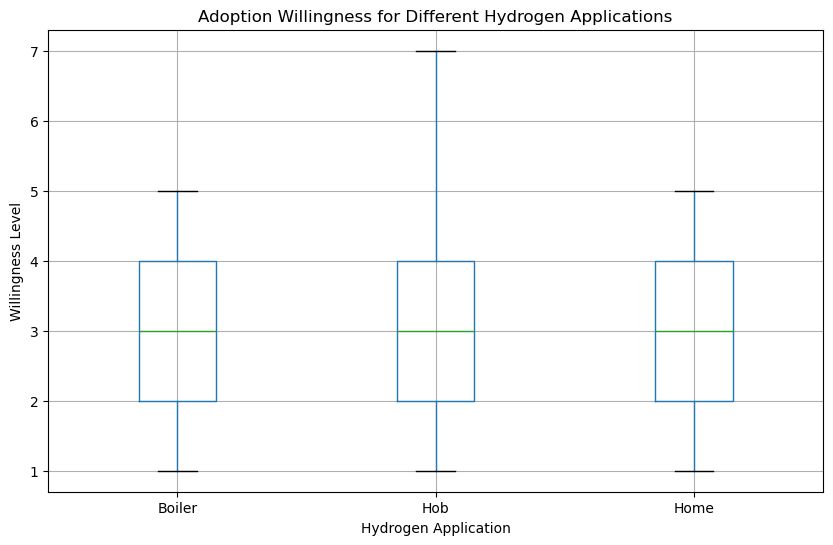

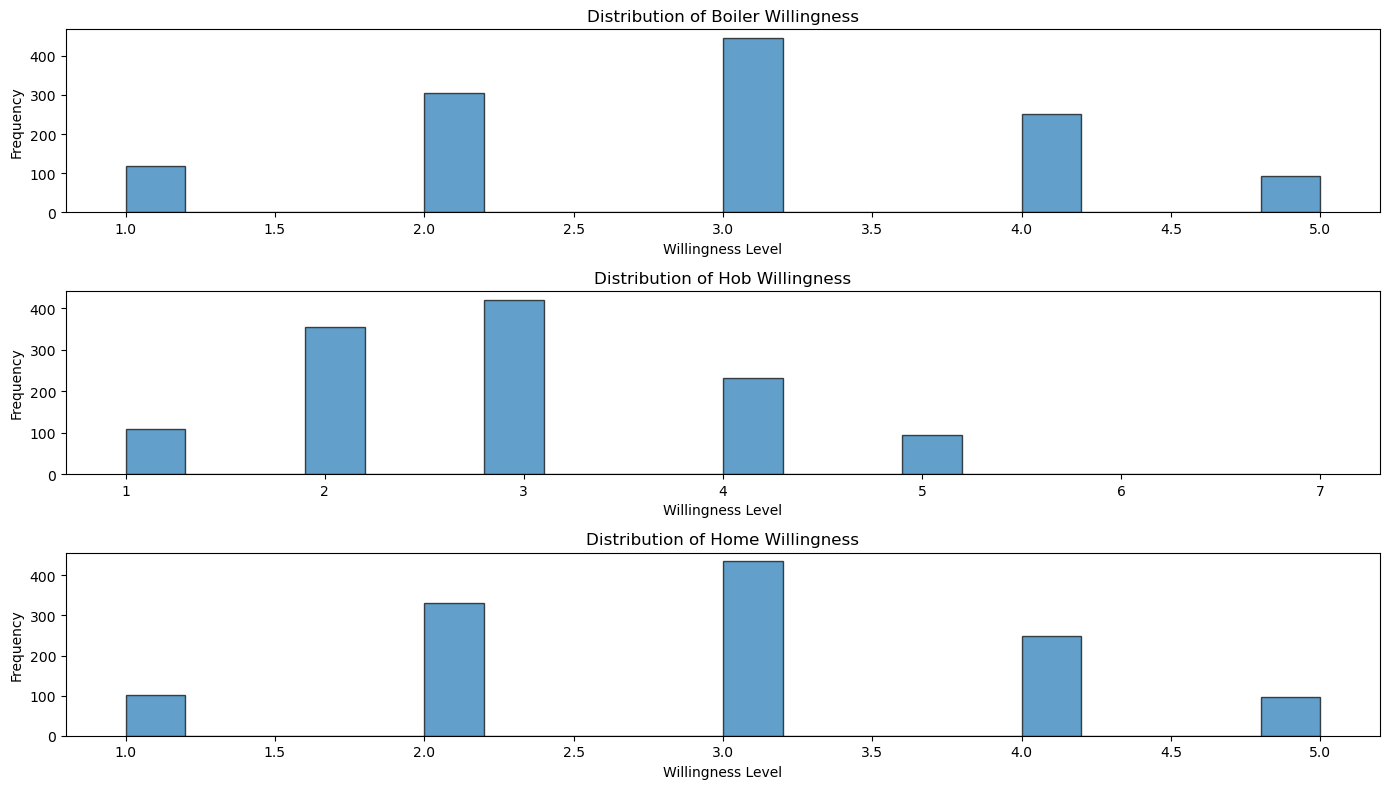


Key Findings:
- Perceived Choice: Higher levels of perceived choice significantly increase the willingness to adopt hydrogen technologies across all applications (Boiler, Hob, Home).
- Knowledge Level: Increased knowledge about hydrogen technologies is a significant predictor of higher willingness to adopt these technologies for all three applications.
- Demographic Factors: Home ownership, age, income, and region do not significantly impact the willingness to adopt hydrogen technologies.
- Consistent Predictors: `Choice` and `Know_recoded` are consistently significant across all models, indicating their robust influence on adoption willingness.
- Policy Implications: Strategies to promote hydrogen technology adoption should focus on enhancing consumer knowledge and increasing the perceived choice available to them.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Load the dataset
file_path = "Hydrogen dataset.csv"
data = pd.read_csv(file_path)

# List of new predictors
new_predictors = ['HomeOwner', 'Choice', 'Age', 'Income', 'Region_recoded', 'Know_recoded']

# Convert relevant columns to numeric, coercing errors for any non-numeric entries
data[new_predictors] = data[new_predictors].apply(pd.to_numeric, errors='coerce')

# Fill missing values with mean of each column
data[new_predictors] = data[new_predictors].fillna(data[new_predictors].mean())

# Drop rows with missing values in target columns
data = data.dropna(subset=['BoilerWilling', 'HobWilling', 'H2homeWilling'])

# Separate features and target variables for each willingness type
X = data[new_predictors]
y_boiler = data['BoilerWilling']
y_hob = data['HobWilling']
y_home = data['H2homeWilling']

# Adding a constant to the model (for statsmodels)
X = sm.add_constant(X)

# Perform linear regression using statsmodels for each willingness type
model_boiler = sm.OLS(y_boiler, X).fit()
model_hob = sm.OLS(y_hob, X).fit()
model_home = sm.OLS(y_home, X).fit()

# Collecting the summary of each model
summary_boiler = model_boiler.summary()
summary_hob = model_hob.summary()
summary_home = model_home.summary()

# Print the summaries
print("Boiler Willingness Model Summary:")
print(summary_boiler)

print("\nHob Willingness Model Summary:")
print(summary_hob)

print("\nHome Willingness Model Summary:")
print(summary_home)

# Descriptive statistics
adoption_columns = ['BoilerWilling', 'HobWilling', 'H2homeWilling']
adoption_stats = data[adoption_columns].describe()
print("\nAdoption Willingness Statistics:")
print(adoption_stats)

# Boxplot for visual comparison of adoption willingness
plt.figure(figsize=(10, 6))
data[adoption_columns].boxplot()
plt.title('Adoption Willingness for Different Hydrogen Applications')
plt.ylabel('Willingness Level')
plt.xlabel('Hydrogen Application')
plt.xticks([1, 2, 3], ['Boiler', 'Hob', 'Home'])
plt.grid(True)
plt.show()

# Plotting the distribution for BoilerWilling, HobWilling, and H2homeWilling
plt.figure(figsize=(14, 8))

# Distribution for BoilerWilling
plt.subplot(3, 1, 1)
data['BoilerWilling'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Boiler Willingness')
plt.xlabel('Willingness Level')
plt.ylabel('Frequency')

# Distribution for HobWilling
plt.subplot(3, 1, 2)
data['HobWilling'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Hob Willingness')
plt.xlabel('Willingness Level')
plt.ylabel('Frequency')

# Distribution for H2homeWilling
plt.subplot(3, 1, 3)
data['H2homeWilling'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Home Willingness')
plt.xlabel('Willingness Level')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Key Findings
print("\nKey Findings:")
print("- Perceived Choice: Higher levels of perceived choice significantly increase the willingness to adopt hydrogen technologies across all applications (Boiler, Hob, Home).")
print("- Knowledge Level: Increased knowledge about hydrogen technologies is a significant predictor of higher willingness to adopt these technologies for all three applications.")
print("- Demographic Factors: Home ownership, age, income, and region do not significantly impact the willingness to adopt hydrogen technologies.")
print("- Consistent Predictors: `Choice` and `Know_recoded` are consistently significant across all models, indicating their robust influence on adoption willingness.")
print("- Policy Implications: Strategies to promote hydrogen technology adoption should focus on enhancing consumer knowledge and increasing the perceived choice available to them.")


In [2]:
# Load the dataset again since the previous environment state has been reset
import pandas as pd
from textblob import TextBlob

# Load the dataset
file_path = "Hydrogen dataset.csv"
data = pd.read_csv(file_path)

# Re-define the initial coding function
def initial_coding(statement):
    codes = []
    if 'trust' in statement or 'don’t trust' in statement or 'confidence' in statement or 'doubt' in statement or 'believe' in statement or 'skeptical' in statement or 'aware' in statement or 'awareness' in statement or 'understanding' in statement:
        codes.append('Trust and Perception')
    if 'affordability' in statement or 'costs' in statement or 'expensive' in statement or 'financial' in statement or 'funding' in statement or 'price' in statement or 'budget' in statement or 'economical' in statement or 'economic' in statement or 'expense' in statement:
        codes.append('Economic Considerations')
    if 'environment' in statement or 'environmental' in statement or 'eco-friendly' in statement or 'sustainable' in statement or 'green' in statement or 'clean energy' in statement or 'pollution' in statement or 'carbon footprint' in statement:
        codes.append('Environmental Impact')
    if 'research' in statement or 'development' in statement or 'innovation' in statement or 'technology' in statement or 'advancement' in statement or 'future' in statement or 'progress' in statement or 'alternative' in statement or 'alternatives' in statement or 'innovation' in statement:
        codes.append('Technological Development')
    if 'interest' in statement or 'opinion' in statement or 'ambivalent' in statement or 'potential' in statement or 'future' in statement or 'perspective' in statement or 'viewpoint' in statement or 'attitude' in statement or 'belief' in statement or 'feedback' in statement:
        codes.append('Public Interest and Opinion')
    return codes

# Apply initial coding to the dataset
data['Initial_Codes'] = data['Statement'].apply(initial_coding)

# Function to group codes into themes
def group_into_themes(codes):
    themes = set()
    if 'Trust and Perception' in codes:
        themes.add('Trust and Perception')
    if 'Economic Considerations' in codes:
        themes.add('Economic Considerations')
    if 'Environmental Impact' in codes:
        themes.add('Environmental Impact')
    if 'Technological Development' in codes:
        themes.add('Technological Development')
    if 'Public Interest and Opinion' in codes:
        themes.add('Public Interest and Opinion')
    return list(themes)

# Apply theme grouping to the dataset
data['Themes'] = data['Initial_Codes'].apply(group_into_themes)

# Extract example extracts for each theme
theme_example_extracts = {}
for index, row in data.iterrows():
    for theme in row['Themes']:
        if theme not in theme_example_extracts:
            theme_example_extracts[theme] = []
        if len(theme_example_extracts[theme]) < 5:  # limiting to first 5 examples for brevity
            theme_example_extracts[theme].append(row['Statement'])

theme_example_extracts


{'Trust and Perception': ['A type of gas I don’t trust because I don’t know much about.',
  "Don't trust.",
  'Hydrogen is something I was not very aware of but now I am into this.',
  'I am skeptical about changing to hydrogen, mostly due to the cost implications of this.',
  'I believe hydrogen homes will be more effective and useful in the oncoming years as it will provide a safer energy supply not just for us but for the environment.'],
 'Public Interest and Opinion': ['After learning about hydrogen hobs or boilers my attitude has grown and willingness to try it as well.',
  'Am not interested about this.',
  'An interesting option in the future.',
  'Cleaner and reliable fuels are essential for the future.',
  'Could be a good change for the future.'],
 'Technological Development': ['Agree with further research and development of hydrogen as an alternate.',
  'An interesting option in the future.',
  'Another unproven technology being rushed through at vast expense just to go gree

In [4]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob

# Load the dataset
file_path = "Hydrogen dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

# Sentiment Analysis

# Calculate sentiment scores using TextBlob
data['Sentiment_Polarity'] = data['Statement'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Summary statistics for sentiment scores
sentiment_summary = data['Sentiment_Polarity'].describe()

# Segmented analysis based on sentiment scores
data['Sentiment_Category'] = data['Sentiment_Polarity'].apply(lambda x: 'Positive' if x > 0.2 else ('Negative' if x < -0.2 else 'Neutral'))

# Display sentiment summary and segmented data
print(sentiment_summary)
print(data[['Statement', 'Sentiment_Polarity', 'Sentiment_Category']].head(10))

# Thematic Analysis

# Define initial coding function
def initial_coding(statement):
    codes = []
    if 'trust' in statement or 'don’t trust' in statement or 'confidence' in statement or 'doubt' in statement or 'believe' in statement or 'skeptical' in statement or 'aware' in statement or 'awareness' in statement or 'understanding' in statement:
        codes.append('Trust and Perception')
    if 'affordability' in statement or 'costs' in statement or 'expensive' in statement or 'financial' in statement or 'funding' in statement or 'price' in statement or 'budget' in statement or 'economical' in statement or 'economic' in statement or 'expense' in statement:
        codes.append('Economic Considerations')
    if 'environment' in statement or 'environmental' in statement or 'eco-friendly' in statement or 'sustainable' in statement or 'green' in statement or 'clean energy' in statement or 'pollution' in statement or 'carbon footprint' in statement:
        codes.append('Environmental Impact')
    if 'research' in statement or 'development' in statement or 'innovation' in statement or 'technology' in statement or 'advancement' in statement or 'future' in statement or 'progress' in statement or 'alternative' in statement or 'alternatives' in statement or 'innovation' in statement:
        codes.append('Technological Development')
    if 'interest' in statement or 'opinion' in statement or 'ambivalent' in statement or 'potential' in statement or 'future' in statement or 'perspective' in statement or 'viewpoint' in statement or 'attitude' in statement or 'belief' in statement or 'feedback' in statement:
        codes.append('Public Interest and Opinion')
    return codes

# Apply initial coding to the dataset
data['Initial_Codes'] = data['Statement'].apply(initial_coding)

# Define function to group codes into themes
def group_into_themes(codes):
    themes = set()
    if 'Trust and Perception' in codes:
        themes.add('Trust and Perception')
    if 'Economic Considerations' in codes:
        themes.add('Economic Considerations')
    if 'Environmental Impact' in codes:
        themes.add('Environmental Impact')
    if 'Technological Development' in codes:
        themes.add('Technological Development')
    if 'Public Interest and Opinion' in codes:
        themes.add('Public Interest and Opinion')
    return list(themes)

# Apply theme grouping to the dataset
data['Themes'] = data['Initial_Codes'].apply(group_into_themes)

# Extract example extracts for each theme
theme_example_extracts = {}
for index, row in data.iterrows():
    for theme in row['Themes']:
        if theme not in theme_example_extracts:
            theme_example_extracts[theme] = []
        if len(theme_example_extracts[theme]) < 5:  # limiting to first 5 examples for brevity
            theme_example_extracts[theme].append(row['Statement'])

# Display example extracts for each theme
for theme, examples in theme_example_extracts.items():
    print(f"Theme: {theme}")
    for example in examples:
        print(f"- {example}")
    print()

# Results Summary

# Define refined keywords for each theme
theme_keywords = {
    "Trust and Perception": ["trust", "don’t trust", "confidence", "doubt", "believe", "skeptical", "aware", "awareness", "understanding"],
    "Economic Considerations": ["affordability", "costs", "expensive", "financial", "funding", "price", "budget", "economical", "economic", "expense"],
    "Environmental Impact": ["environment", "environmental", "eco-friendly", "sustainable", "green", "clean energy", "pollution", "carbon footprint"],
    "Technological Development": ["research", "development", "innovation", "technology", "advancement", "future", "progress", "alternative", "alternatives", "innovation"],
    "Public Interest and Opinion": ["interest", "opinion", "ambivalent", "potential", "future", "perspective", "viewpoint", "attitude", "belief", "feedback"]
}

# Create a table of themes and their keywords
theme_keywords_table = pd.DataFrame([
    {"Theme": theme, "Keywords": ", ".join(keywords)}
    for theme, keywords in theme_keywords.items()
])

print(theme_keywords_table)


count    1213.000000
mean        0.219786
std         0.298920
min        -0.900000
25%         0.000000
50%         0.200000
75%         0.475000
max         1.000000
Name: Sentiment_Polarity, dtype: float64
                                           Statement  Sentiment_Polarity  \
0  A type of gas I don’t trust because I don’t kn...            0.200000   
1                Affordability when times are tough.           -0.388889   
2  After learning about hydrogen hobs or boilers ...            0.000000   
3  Agree with further research and development of...            0.000000   
4  All costs to be funded by windfall tax on ener...            0.000000   
5         All modern and better for the environment.            0.350000   
6  Although I feel hydrogen would be one of the a...            0.000000   
7                      Am not interested about this.           -0.125000   
8  Ambivalent; it seems like a great idea as long...            0.375000   
9               An interesting 